In [ ]:
import os
import glob
import shutil
import argparse
import pandas as pd
from tqdm import tqdm
from deepface import DeepFace
import matplotlib.pyplot as plt

In [1]:
class FaceDetector:
    def __init__(self, image_dir, output_csv, backend='mtcnn', remove_undetected=False, create_undetected_folder=False):
        # Initialize the FaceDetector with necessary parameters
        self.image_dir = image_dir
        self.output_csv = output_csv
        self.backend = backend
        self.remove_undetected = remove_undetected
        self.create_undetected_folder = create_undetected_folder

        # Generate the folder name for non-detected faces based on the image directory
        image_dir_name = os.path.basename(os.path.normpath(image_dir))
        self.undetected_folder = os.path.join(image_dir, f"../non_detected_faces_{image_dir_name}")

        # Check if output CSV file or undetected folder already exists and confirm overwrite if needed
        if os.path.exists(self.output_csv) and not self.confirm_overwrite(self.output_csv):
            raise Exception("Operation aborted by the user.")
        
        if self.create_undetected_folder and os.path.exists(self.undetected_folder) and not self.confirm_overwrite(self.undetected_folder):
            raise Exception("Operation aborted by the user.")

    def confirm_overwrite(self, path):
        # Confirm overwrite if a file or directory already exists
        response = input(f"{path} already exists. Do you want to overwrite it? (y/n): ").lower()
        return response == 'y'

    def detect_faces(self):
        # Detect faces in all images within the specified directory
        image_paths = glob.glob(os.path.join(self.image_dir, "*"))
        non_detected_images = []

        # Process each image file
        for path in tqdm(image_paths, desc="Processing Images"):
            ext = os.path.splitext(path)[1].lower()
            if ext in [".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"]:
                try:
                    # Attempt face detection using DeepFace
                    detected_faces = DeepFace.extract_faces(img_path=path, enforce_detection=True, detector_backend=self.backend)
                    # Handle images with no detected faces
                    if not detected_faces:
                        non_detected_images.append(os.path.basename(path))
                        if self.remove_undetected:
                            if self.create_undetected_folder:
                                self._move_to_undetected_folder(path)
                            else:
                                os.remove(path)
                except ValueError as e:
                    # Handle exceptions during face detection
                    non_detected_images.append(os.path.basename(path))
                    if self.remove_undetected:
                        if self.create_undetected_folder:
                            self._move_to_undetected_folder(path)
                        else:
                            os.remove(path)

        # Save the list of non-detected images to a CSV file
        pd.DataFrame(non_detected_images, columns=["non_detected_filenames"]).to_csv(self.output_csv, index=False)

    def _move_to_undetected_folder(self, file_path):
        # Move a file to the undetected folder
        if not os.path.exists(self.undetected_folder):
            os.makedirs(self.undetected_folder, exist_ok=True)
        shutil.move(file_path, os.path.join(self.undetected_folder, os.path.basename(file_path)))

    @staticmethod
    def parse_args():
        # Define command line arguments for the script
        parser = argparse.ArgumentParser(description="Detect faces in images and handle non-detected faces.")
        parser.add_argument("-i", "--image_dir", required=True, help="Directory containing images.")
        parser.add_argument("-o", "--output_csv", required=True, help="CSV file to store non-detected images data.")
        parser.add_argument("-b", "--backend", default='mtcnn', help="Detector backend (e.g., 'opencv', 'ssd', 'dlib', 'mtcnn'). Default is 'mtcnn'.")
        parser.add_argument("-r", "--remove_undetected", action='store_true', help="Remove images where no faces are detected.")
        parser.add_argument("-c", "--create_undetected_folder", action='store_true', help="Create folder for non-detected faces.")
        return parser.parse_args()


if __name__ == "__main__":
    detector = FaceDetector(
        image_dir='johndoe',
        output_csv='non_detect_johndoe.csv',
        remove_undetected=True,
        create_undetected_folder= True
    )

    detector.detect_faces()




2023-12-09 19:03:33.161461: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-09 19:03:33.186098: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-09 19:03:33.186124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-09 19:03:33.186785: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-09 19:03:33.191126: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-09 19:03:33.193088: I tensorflow/core/platform/cpu_feature_guard.cc:1

non_detect_johndoe.csv already exists. Do you want to overwrite it? (y/n): y
johndoe/../non_detected_faces_johndoe already exists. Do you want to overwrite it? (y/n): y


Processing Images:   0%|          | 0/500 [00:00<?, ?it/s]2023-12-09 19:04:15.937185: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 87ms/step


Processing Images:   0%|          | 1/500 [00:01<14:54,  1.79s/it]

1/1 [==============================] - 0s 18ms/step


Processing Images:   0%|          | 2/500 [00:02<09:33,  1.15s/it]

1/1 [==============================] - 0s 14ms/step


Processing Images:   1%|          | 3/500 [00:03<07:51,  1.05it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:   1%|          | 4/500 [00:03<06:24,  1.29it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:   1%|          | 5/500 [00:04<05:48,  1.42it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:   1%|          | 6/500 [00:04<05:07,  1.61it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:   1%|▏         | 7/500 [00:05<04:50,  1.70it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:   2%|▏         | 8/500 [00:05<04:36,  1.78it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:   2%|▏         | 9/500 [00:06<04:42,  1.74it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:   2%|▏         | 10/500 [00:07<04:50,  1.69it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:   2%|▏         | 11/500 [00:07<04:54,  1.66it/s]

1/1 [==============================] - 0s 27ms/step


Processing Images:   2%|▏         | 12/500 [00:08<05:13,  1.56it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   3%|▎         | 13/500 [00:09<05:16,  1.54it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:   3%|▎         | 14/500 [00:09<05:45,  1.41it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   3%|▎         | 15/500 [00:10<05:08,  1.57it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   3%|▎         | 16/500 [00:11<05:19,  1.52it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   3%|▎         | 17/500 [00:11<05:26,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   4%|▎         | 18/500 [00:12<05:27,  1.47it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:   4%|▍         | 19/500 [00:13<05:46,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:   4%|▍         | 20/500 [00:13<05:30,  1.45it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:   4%|▍         | 21/500 [00:14<05:16,  1.51it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:   4%|▍         | 22/500 [00:14<04:40,  1.70it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:   5%|▍         | 23/500 [00:15<05:14,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   5%|▍         | 24/500 [00:16<05:00,  1.59it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:   5%|▌         | 25/500 [00:16<05:02,  1.57it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:   5%|▌         | 26/500 [00:17<04:58,  1.59it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:   5%|▌         | 27/500 [00:18<04:53,  1.61it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:   6%|▌         | 28/500 [00:18<04:58,  1.58it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   6%|▌         | 29/500 [00:19<05:09,  1.52it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   6%|▌         | 30/500 [00:20<05:00,  1.56it/s]

1/1 [==============================] - 0s 33ms/step


Processing Images:   6%|▌         | 31/500 [00:20<04:48,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   6%|▋         | 32/500 [00:21<04:34,  1.70it/s]

1/1 [==============================] - 0s 31ms/step


Processing Images:   7%|▋         | 33/500 [00:21<04:23,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   7%|▋         | 34/500 [00:22<04:25,  1.76it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   7%|▋         | 35/500 [00:23<05:08,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   7%|▋         | 36/500 [00:23<05:04,  1.52it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:   7%|▋         | 37/500 [00:24<04:38,  1.66it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:   8%|▊         | 38/500 [00:25<04:54,  1.57it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:   8%|▊         | 39/500 [00:25<05:07,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   8%|▊         | 40/500 [00:26<04:37,  1.65it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:   8%|▊         | 41/500 [00:26<04:55,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   8%|▊         | 42/500 [00:27<05:04,  1.51it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:   9%|▊         | 43/500 [00:28<04:57,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   9%|▉         | 44/500 [00:28<04:39,  1.63it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   9%|▉         | 45/500 [00:29<04:37,  1.64it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:   9%|▉         | 46/500 [00:30<04:35,  1.65it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:   9%|▉         | 47/500 [00:30<04:35,  1.64it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  10%|▉         | 48/500 [00:31<04:54,  1.53it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  10%|▉         | 49/500 [00:32<04:54,  1.53it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  10%|█         | 50/500 [00:32<04:33,  1.64it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  10%|█         | 51/500 [00:33<04:47,  1.56it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  10%|█         | 52/500 [00:33<04:39,  1.60it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  11%|█         | 53/500 [00:34<04:46,  1.56it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  11%|█         | 54/500 [00:35<04:37,  1.61it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  11%|█         | 55/500 [00:35<04:41,  1.58it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  11%|█         | 56/500 [00:36<04:15,  1.74it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  11%|█▏        | 57/500 [00:36<04:07,  1.79it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  12%|█▏        | 58/500 [00:37<04:13,  1.75it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  12%|█▏        | 59/500 [00:38<04:31,  1.62it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  12%|█▏        | 60/500 [00:38<04:48,  1.52it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  12%|█▏        | 61/500 [00:39<04:51,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  12%|█▏        | 62/500 [00:40<04:46,  1.53it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  13%|█▎        | 63/500 [00:40<04:49,  1.51it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  13%|█▎        | 64/500 [00:41<04:42,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  13%|█▎        | 65/500 [00:42<04:47,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  13%|█▎        | 66/500 [00:42<04:42,  1.54it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  13%|█▎        | 67/500 [00:43<04:49,  1.49it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  14%|█▎        | 68/500 [00:44<04:41,  1.54it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  14%|█▍        | 69/500 [00:44<04:38,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  14%|█▍        | 70/500 [00:45<04:31,  1.58it/s]

1/1 [==============================] - 0s 13ms/step


Processing Images:  14%|█▍        | 71/500 [00:45<04:25,  1.62it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  14%|█▍        | 72/500 [00:46<04:40,  1.53it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  15%|█▍        | 73/500 [00:47<04:35,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  15%|█▍        | 74/500 [00:47<04:32,  1.57it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  15%|█▌        | 75/500 [00:48<04:37,  1.53it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  15%|█▌        | 76/500 [00:49<05:00,  1.41it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  15%|█▌        | 77/500 [00:49<04:42,  1.50it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  16%|█▌        | 78/500 [00:50<04:37,  1.52it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  16%|█▌        | 79/500 [00:51<04:48,  1.46it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  16%|█▌        | 80/500 [00:51<04:10,  1.68it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  16%|█▌        | 81/500 [00:52<04:09,  1.68it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  16%|█▋        | 82/500 [00:52<03:53,  1.79it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  17%|█▋        | 83/500 [00:53<04:17,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  17%|█▋        | 84/500 [00:54<04:15,  1.63it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  17%|█▋        | 85/500 [00:54<04:13,  1.63it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  17%|█▋        | 86/500 [00:55<04:28,  1.54it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  17%|█▋        | 87/500 [00:56<04:38,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  18%|█▊        | 88/500 [00:56<04:28,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  18%|█▊        | 89/500 [00:57<04:23,  1.56it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  18%|█▊        | 90/500 [00:58<04:21,  1.57it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  18%|█▊        | 91/500 [00:58<04:08,  1.65it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  18%|█▊        | 92/500 [00:59<04:08,  1.64it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  19%|█▊        | 93/500 [00:59<04:05,  1.66it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  19%|█▉        | 94/500 [01:00<03:33,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  19%|█▉        | 95/500 [01:00<03:52,  1.74it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  19%|█▉        | 96/500 [01:01<04:05,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  19%|█▉        | 97/500 [01:02<03:52,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  20%|█▉        | 98/500 [01:02<04:20,  1.54it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  20%|█▉        | 99/500 [01:03<03:52,  1.72it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  20%|██        | 100/500 [01:03<03:26,  1.93it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  20%|██        | 101/500 [01:04<03:29,  1.91it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  20%|██        | 102/500 [01:04<03:30,  1.89it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  21%|██        | 103/500 [01:05<03:42,  1.78it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  21%|██        | 104/500 [01:05<03:39,  1.80it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  21%|██        | 105/500 [01:06<03:43,  1.77it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  21%|██        | 106/500 [01:07<03:54,  1.68it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  21%|██▏       | 107/500 [01:07<04:09,  1.57it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  22%|██▏       | 108/500 [01:08<03:59,  1.64it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  22%|██▏       | 109/500 [01:09<03:58,  1.64it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  22%|██▏       | 110/500 [01:09<03:48,  1.70it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  22%|██▏       | 111/500 [01:10<03:55,  1.65it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  22%|██▏       | 112/500 [01:10<03:48,  1.70it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  23%|██▎       | 113/500 [01:11<03:56,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  23%|██▎       | 114/500 [01:12<04:17,  1.50it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  23%|██▎       | 115/500 [01:12<04:15,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  23%|██▎       | 116/500 [01:13<04:01,  1.59it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  23%|██▎       | 117/500 [01:14<03:55,  1.63it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  24%|██▎       | 118/500 [01:14<04:20,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  24%|██▍       | 119/500 [01:15<04:25,  1.43it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  24%|██▍       | 120/500 [01:16<04:13,  1.50it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  24%|██▍       | 121/500 [01:16<04:23,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  24%|██▍       | 122/500 [01:17<04:04,  1.55it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  25%|██▍       | 123/500 [01:17<03:36,  1.74it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  25%|██▍       | 124/500 [01:18<03:49,  1.64it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  25%|██▌       | 125/500 [01:19<03:35,  1.74it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  25%|██▌       | 126/500 [01:19<03:40,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  25%|██▌       | 127/500 [01:20<03:53,  1.60it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  26%|██▌       | 128/500 [01:21<03:56,  1.57it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  26%|██▌       | 129/500 [01:21<04:21,  1.42it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  26%|██▌       | 130/500 [01:22<04:09,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  26%|██▌       | 131/500 [01:23<04:00,  1.54it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  26%|██▋       | 132/500 [01:23<03:55,  1.56it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  27%|██▋       | 133/500 [01:24<03:52,  1.58it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  27%|██▋       | 134/500 [01:24<03:38,  1.68it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  27%|██▋       | 135/500 [01:25<03:15,  1.86it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  27%|██▋       | 136/500 [01:25<03:24,  1.78it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  27%|██▋       | 137/500 [01:26<03:26,  1.76it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  28%|██▊       | 138/500 [01:27<03:46,  1.60it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  28%|██▊       | 139/500 [01:27<03:24,  1.76it/s]

1/1 [==============================] - 0s 13ms/step


Processing Images:  28%|██▊       | 140/500 [01:28<03:14,  1.85it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  28%|██▊       | 141/500 [01:28<03:21,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  28%|██▊       | 142/500 [01:29<03:22,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  29%|██▊       | 143/500 [01:29<03:18,  1.80it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  29%|██▉       | 144/500 [01:30<03:22,  1.76it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  29%|██▉       | 145/500 [01:30<03:17,  1.80it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  29%|██▉       | 146/500 [01:31<03:28,  1.70it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  29%|██▉       | 147/500 [01:32<03:37,  1.62it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  30%|██▉       | 148/500 [01:32<03:37,  1.62it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  30%|██▉       | 149/500 [01:33<03:46,  1.55it/s]

1/1 [==============================] - 0s 28ms/step


Processing Images:  30%|███       | 150/500 [01:34<03:57,  1.47it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  30%|███       | 151/500 [01:35<04:09,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  30%|███       | 152/500 [01:35<03:49,  1.52it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  31%|███       | 153/500 [01:36<03:47,  1.52it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  31%|███       | 154/500 [01:37<03:48,  1.52it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  31%|███       | 155/500 [01:37<03:48,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  31%|███       | 156/500 [01:38<03:44,  1.53it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  31%|███▏      | 157/500 [01:38<03:38,  1.57it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  32%|███▏      | 158/500 [01:39<03:26,  1.66it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  32%|███▏      | 159/500 [01:40<03:45,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  32%|███▏      | 160/500 [01:40<03:42,  1.53it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  32%|███▏      | 161/500 [01:41<03:25,  1.65it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  32%|███▏      | 162/500 [01:42<03:29,  1.61it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  33%|███▎      | 163/500 [01:42<03:47,  1.48it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  33%|███▎      | 164/500 [01:43<03:28,  1.61it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  33%|███▎      | 165/500 [01:43<03:23,  1.65it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  33%|███▎      | 166/500 [01:44<03:20,  1.67it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  33%|███▎      | 167/500 [01:45<03:37,  1.53it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  34%|███▎      | 168/500 [01:46<03:45,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  34%|███▍      | 169/500 [01:46<03:37,  1.52it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  34%|███▍      | 170/500 [01:47<03:34,  1.54it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  34%|███▍      | 171/500 [01:47<03:38,  1.51it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  34%|███▍      | 172/500 [01:48<03:46,  1.45it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  35%|███▍      | 173/500 [01:49<03:48,  1.43it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  35%|███▍      | 174/500 [01:50<03:37,  1.50it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  35%|███▌      | 175/500 [01:50<03:48,  1.42it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  35%|███▌      | 176/500 [01:51<03:54,  1.38it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  35%|███▌      | 177/500 [01:52<03:36,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  36%|███▌      | 178/500 [01:52<03:44,  1.44it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  36%|███▌      | 179/500 [01:53<03:37,  1.48it/s]

1/1 [==============================] - 0s 27ms/step


Processing Images:  36%|███▌      | 180/500 [01:54<03:34,  1.49it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  36%|███▌      | 181/500 [01:54<03:31,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  36%|███▋      | 182/500 [01:55<03:48,  1.39it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  37%|███▋      | 183/500 [01:56<03:30,  1.51it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  37%|███▋      | 184/500 [01:56<03:15,  1.62it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  37%|███▋      | 185/500 [01:57<03:12,  1.64it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  37%|███▋      | 186/500 [01:57<03:11,  1.64it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  37%|███▋      | 187/500 [01:58<03:39,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  38%|███▊      | 188/500 [01:59<03:32,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  38%|███▊      | 189/500 [02:00<03:24,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  38%|███▊      | 190/500 [02:00<03:13,  1.61it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  38%|███▊      | 191/500 [02:01<03:22,  1.53it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  38%|███▊      | 192/500 [02:02<03:24,  1.50it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  39%|███▊      | 193/500 [02:02<03:19,  1.54it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  39%|███▉      | 194/500 [02:03<03:22,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  39%|███▉      | 195/500 [02:04<03:28,  1.46it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  39%|███▉      | 196/500 [02:04<03:20,  1.52it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  39%|███▉      | 197/500 [02:05<03:18,  1.52it/s]

1/1 [==============================] - 0s 29ms/step


Processing Images:  40%|███▉      | 198/500 [02:06<03:20,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  40%|███▉      | 199/500 [02:06<03:08,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  40%|████      | 200/500 [02:06<02:45,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  40%|████      | 201/500 [02:07<02:49,  1.76it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  40%|████      | 202/500 [02:08<02:45,  1.80it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  41%|████      | 203/500 [02:08<02:39,  1.87it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  41%|████      | 204/500 [02:09<02:40,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  41%|████      | 205/500 [02:09<02:54,  1.69it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  41%|████      | 206/500 [02:10<02:53,  1.69it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  41%|████▏     | 207/500 [02:10<02:43,  1.79it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  42%|████▏     | 208/500 [02:11<02:44,  1.77it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  42%|████▏     | 209/500 [02:12<02:46,  1.75it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  42%|████▏     | 210/500 [02:12<02:55,  1.65it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  42%|████▏     | 211/500 [02:13<02:34,  1.87it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  42%|████▏     | 212/500 [02:13<02:46,  1.73it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  43%|████▎     | 213/500 [02:14<02:59,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  43%|████▎     | 214/500 [02:15<03:01,  1.58it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  43%|████▎     | 215/500 [02:15<03:04,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  43%|████▎     | 216/500 [02:16<03:01,  1.57it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  43%|████▎     | 217/500 [02:16<02:42,  1.75it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  44%|████▎     | 218/500 [02:17<02:36,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  44%|████▍     | 219/500 [02:18<02:39,  1.76it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  44%|████▍     | 220/500 [02:18<02:38,  1.77it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  44%|████▍     | 221/500 [02:19<02:33,  1.82it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  44%|████▍     | 222/500 [02:19<02:36,  1.78it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  45%|████▍     | 223/500 [02:20<02:56,  1.57it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  45%|████▍     | 224/500 [02:21<03:14,  1.42it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  45%|████▌     | 225/500 [02:21<02:51,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  45%|████▌     | 226/500 [02:22<03:03,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  45%|████▌     | 227/500 [02:23<02:55,  1.55it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  46%|████▌     | 228/500 [02:23<03:12,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  46%|████▌     | 229/500 [02:24<03:08,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  46%|████▌     | 230/500 [02:25<02:51,  1.57it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  46%|████▌     | 231/500 [02:25<02:37,  1.71it/s]

1/1 [==============================] - 0s 27ms/step


Processing Images:  46%|████▋     | 232/500 [02:26<02:52,  1.56it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  47%|████▋     | 233/500 [02:27<02:58,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  47%|████▋     | 234/500 [02:27<02:53,  1.54it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  47%|████▋     | 235/500 [02:28<03:06,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  47%|████▋     | 236/500 [02:29<03:09,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  47%|████▋     | 237/500 [02:30<03:12,  1.37it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  48%|████▊     | 238/500 [02:30<03:09,  1.38it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  48%|████▊     | 239/500 [02:31<03:14,  1.34it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  48%|████▊     | 240/500 [02:32<03:17,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  48%|████▊     | 241/500 [02:33<03:09,  1.37it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  48%|████▊     | 242/500 [02:33<02:54,  1.48it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  49%|████▊     | 243/500 [02:34<03:00,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  49%|████▉     | 244/500 [02:34<02:54,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  49%|████▉     | 245/500 [02:35<03:00,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  49%|████▉     | 246/500 [02:36<03:09,  1.34it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  49%|████▉     | 247/500 [02:37<03:06,  1.35it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  50%|████▉     | 248/500 [02:37<02:37,  1.60it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  50%|████▉     | 249/500 [02:38<02:39,  1.58it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  50%|█████     | 250/500 [02:39<02:45,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  50%|█████     | 251/500 [02:39<02:57,  1.40it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  50%|█████     | 252/500 [02:40<02:50,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  51%|█████     | 253/500 [02:41<02:55,  1.40it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  51%|█████     | 254/500 [02:41<02:53,  1.42it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  51%|█████     | 255/500 [02:42<02:59,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  51%|█████     | 256/500 [02:43<02:58,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  51%|█████▏    | 257/500 [02:44<02:44,  1.48it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  52%|█████▏    | 258/500 [02:44<02:48,  1.43it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  52%|█████▏    | 259/500 [02:45<02:35,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  52%|█████▏    | 260/500 [02:45<02:32,  1.57it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  52%|█████▏    | 261/500 [02:46<02:24,  1.65it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  52%|█████▏    | 262/500 [02:47<02:18,  1.71it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  53%|█████▎    | 263/500 [02:47<02:19,  1.70it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  53%|█████▎    | 264/500 [02:48<02:20,  1.68it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  53%|█████▎    | 265/500 [02:48<02:27,  1.59it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  53%|█████▎    | 266/500 [02:49<02:24,  1.62it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  53%|█████▎    | 267/500 [02:50<02:18,  1.68it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  54%|█████▎    | 268/500 [02:50<02:20,  1.65it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  54%|█████▍    | 269/500 [02:51<02:20,  1.65it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  54%|█████▍    | 270/500 [02:52<02:27,  1.56it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  54%|█████▍    | 271/500 [02:52<02:19,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  54%|█████▍    | 272/500 [02:53<02:20,  1.63it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  55%|█████▍    | 273/500 [02:53<02:12,  1.72it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  55%|█████▍    | 274/500 [02:54<02:06,  1.79it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  55%|█████▌    | 275/500 [02:54<02:19,  1.61it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  55%|█████▌    | 276/500 [02:55<02:23,  1.56it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  55%|█████▌    | 277/500 [02:56<02:21,  1.58it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  56%|█████▌    | 278/500 [02:57<02:32,  1.45it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  56%|█████▌    | 279/500 [02:57<02:16,  1.61it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  56%|█████▌    | 280/500 [02:58<02:14,  1.63it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  56%|█████▌    | 281/500 [02:58<02:17,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  56%|█████▋    | 282/500 [02:59<02:16,  1.60it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  57%|█████▋    | 283/500 [02:59<02:06,  1.72it/s]

1/1 [==============================] - 0s 13ms/step


Processing Images:  57%|█████▋    | 284/500 [03:00<02:00,  1.79it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  57%|█████▋    | 285/500 [03:01<02:09,  1.66it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  57%|█████▋    | 286/500 [03:01<02:15,  1.58it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  57%|█████▋    | 287/500 [03:02<02:24,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  58%|█████▊    | 288/500 [03:03<02:17,  1.54it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  58%|█████▊    | 289/500 [03:03<02:14,  1.57it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  58%|█████▊    | 290/500 [03:04<02:17,  1.52it/s]

1/1 [==============================] - 0s 28ms/step


Processing Images:  58%|█████▊    | 291/500 [03:05<02:32,  1.37it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  58%|█████▊    | 292/500 [03:06<02:40,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  59%|█████▊    | 293/500 [03:06<02:27,  1.40it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  59%|█████▉    | 294/500 [03:07<02:19,  1.47it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  59%|█████▉    | 295/500 [03:08<02:20,  1.46it/s]

1/1 [==============================] - 0s 13ms/step


Processing Images:  59%|█████▉    | 296/500 [03:08<01:51,  1.82it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  59%|█████▉    | 297/500 [03:09<02:00,  1.68it/s]

1/1 [==============================] - 0s 28ms/step


Processing Images:  60%|█████▉    | 298/500 [03:09<02:07,  1.59it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  60%|█████▉    | 299/500 [03:10<02:17,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  60%|██████    | 300/500 [03:11<02:20,  1.43it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  60%|██████    | 301/500 [03:11<02:12,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  60%|██████    | 302/500 [03:12<02:04,  1.59it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  61%|██████    | 303/500 [03:13<02:19,  1.41it/s]

1/1 [==============================] - 0s 28ms/step


Processing Images:  61%|██████    | 304/500 [03:14<02:36,  1.25it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  61%|██████    | 305/500 [03:14<02:24,  1.34it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  61%|██████    | 306/500 [03:15<02:33,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  61%|██████▏   | 307/500 [03:16<02:21,  1.36it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  62%|██████▏   | 308/500 [03:17<02:24,  1.33it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  62%|██████▏   | 309/500 [03:17<02:16,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  62%|██████▏   | 310/500 [03:18<02:20,  1.35it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  62%|██████▏   | 311/500 [03:19<02:11,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  62%|██████▏   | 312/500 [03:19<02:03,  1.52it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  63%|██████▎   | 313/500 [03:20<02:02,  1.53it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  63%|██████▎   | 314/500 [03:21<02:04,  1.50it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  63%|██████▎   | 315/500 [03:21<02:01,  1.52it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  63%|██████▎   | 316/500 [03:22<02:00,  1.53it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  63%|██████▎   | 317/500 [03:23<01:54,  1.60it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  64%|██████▎   | 318/500 [03:23<01:50,  1.65it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  64%|██████▍   | 319/500 [03:24<01:57,  1.55it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  64%|██████▍   | 320/500 [03:25<01:58,  1.52it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  64%|██████▍   | 321/500 [03:26<02:14,  1.33it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  64%|██████▍   | 322/500 [03:26<02:11,  1.35it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  65%|██████▍   | 323/500 [03:27<01:58,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  65%|██████▍   | 324/500 [03:27<02:00,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  65%|██████▌   | 325/500 [03:28<01:55,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  65%|██████▌   | 326/500 [03:29<01:48,  1.61it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  65%|██████▌   | 327/500 [03:29<01:33,  1.85it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  66%|██████▌   | 328/500 [03:30<01:36,  1.79it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  66%|██████▌   | 329/500 [03:30<01:44,  1.63it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  66%|██████▌   | 330/500 [03:31<01:40,  1.69it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  66%|██████▌   | 331/500 [03:31<01:40,  1.69it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  66%|██████▋   | 332/500 [03:32<01:33,  1.79it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  67%|██████▋   | 333/500 [03:32<01:32,  1.81it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  67%|██████▋   | 334/500 [03:33<01:40,  1.65it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  67%|██████▋   | 335/500 [03:34<01:40,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  67%|██████▋   | 336/500 [03:34<01:33,  1.76it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  67%|██████▋   | 337/500 [03:35<01:34,  1.73it/s]

1/1 [==============================] - 0s 13ms/step


Processing Images:  68%|██████▊   | 338/500 [03:35<01:25,  1.90it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  68%|██████▊   | 339/500 [03:36<01:37,  1.66it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  68%|██████▊   | 340/500 [03:37<01:37,  1.64it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  68%|██████▊   | 341/500 [03:37<01:47,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  68%|██████▊   | 342/500 [03:38<01:51,  1.42it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  69%|██████▊   | 343/500 [03:39<01:48,  1.45it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  69%|██████▉   | 344/500 [03:40<01:53,  1.37it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  69%|██████▉   | 345/500 [03:40<01:51,  1.39it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  69%|██████▉   | 346/500 [03:41<01:50,  1.39it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  69%|██████▉   | 347/500 [03:42<01:50,  1.39it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  70%|██████▉   | 348/500 [03:43<01:49,  1.39it/s]

1/1 [==============================] - 0s 13ms/step


Processing Images:  70%|██████▉   | 349/500 [03:43<01:28,  1.71it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  70%|███████   | 350/500 [03:43<01:25,  1.76it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  70%|███████   | 351/500 [03:44<01:23,  1.78it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  70%|███████   | 352/500 [03:45<01:24,  1.75it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  71%|███████   | 353/500 [03:45<01:29,  1.65it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  71%|███████   | 354/500 [03:46<01:19,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  71%|███████   | 355/500 [03:46<01:15,  1.92it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  71%|███████   | 356/500 [03:47<01:29,  1.61it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  71%|███████▏  | 357/500 [03:48<01:40,  1.42it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  72%|███████▏  | 358/500 [03:49<01:41,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  72%|███████▏  | 359/500 [03:49<01:43,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  72%|███████▏  | 360/500 [03:50<01:30,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  72%|███████▏  | 361/500 [03:50<01:23,  1.67it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  72%|███████▏  | 362/500 [03:51<01:23,  1.66it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  73%|███████▎  | 363/500 [03:52<01:25,  1.60it/s]

1/1 [==============================] - 0s 27ms/step


Processing Images:  73%|███████▎  | 364/500 [03:52<01:32,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  73%|███████▎  | 365/500 [03:53<01:31,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  73%|███████▎  | 366/500 [03:54<01:32,  1.44it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  73%|███████▎  | 367/500 [03:55<01:33,  1.42it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  74%|███████▎  | 368/500 [03:55<01:35,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  74%|███████▍  | 369/500 [03:56<01:29,  1.47it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  74%|███████▍  | 370/500 [03:57<01:34,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  74%|███████▍  | 371/500 [03:57<01:30,  1.42it/s]

1/1 [==============================] - 0s 27ms/step


Processing Images:  74%|███████▍  | 372/500 [03:58<01:34,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  75%|███████▍  | 373/500 [03:59<01:31,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  75%|███████▍  | 374/500 [03:59<01:26,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  75%|███████▌  | 375/500 [04:00<01:21,  1.54it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  75%|███████▌  | 376/500 [04:01<01:22,  1.50it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  75%|███████▌  | 377/500 [04:02<01:28,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  76%|███████▌  | 378/500 [04:02<01:21,  1.50it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  76%|███████▌  | 379/500 [04:03<01:12,  1.67it/s]

1/1 [==============================] - 0s 27ms/step


Processing Images:  76%|███████▌  | 380/500 [04:03<01:21,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  76%|███████▌  | 381/500 [04:04<01:26,  1.37it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  76%|███████▋  | 382/500 [04:05<01:22,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  77%|███████▋  | 383/500 [04:06<01:20,  1.45it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  77%|███████▋  | 384/500 [04:06<01:17,  1.50it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  77%|███████▋  | 385/500 [04:07<01:22,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  77%|███████▋  | 386/500 [04:08<01:19,  1.43it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  77%|███████▋  | 387/500 [04:08<01:18,  1.45it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  78%|███████▊  | 388/500 [04:09<01:11,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  78%|███████▊  | 389/500 [04:10<01:13,  1.51it/s]

1/1 [==============================] - 0s 11ms/step


Processing Images:  78%|███████▊  | 390/500 [04:10<01:00,  1.81it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  78%|███████▊  | 391/500 [04:11<01:09,  1.57it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  78%|███████▊  | 392/500 [04:11<01:02,  1.72it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  79%|███████▊  | 393/500 [04:12<01:00,  1.77it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  79%|███████▉  | 394/500 [04:12<01:03,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  79%|███████▉  | 395/500 [04:13<00:53,  1.95it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  79%|███████▉  | 396/500 [04:13<00:57,  1.80it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  79%|███████▉  | 397/500 [04:14<00:56,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  80%|███████▉  | 398/500 [04:14<00:51,  1.98it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  80%|███████▉  | 399/500 [04:15<00:58,  1.74it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  80%|████████  | 400/500 [04:16<00:56,  1.78it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  80%|████████  | 401/500 [04:16<00:59,  1.66it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  80%|████████  | 402/500 [04:17<00:55,  1.78it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  81%|████████  | 403/500 [04:17<01:00,  1.61it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  81%|████████  | 404/500 [04:18<00:56,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  81%|████████  | 405/500 [04:19<01:00,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  81%|████████  | 406/500 [04:19<00:56,  1.67it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  81%|████████▏ | 407/500 [04:20<00:52,  1.77it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  82%|████████▏ | 408/500 [04:20<00:50,  1.81it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  82%|████████▏ | 409/500 [04:21<00:49,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  82%|████████▏ | 410/500 [04:21<00:53,  1.68it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  82%|████████▏ | 411/500 [04:22<01:00,  1.48it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  82%|████████▏ | 412/500 [04:23<00:54,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  83%|████████▎ | 413/500 [04:24<00:56,  1.54it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  83%|████████▎ | 414/500 [04:24<00:49,  1.74it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  83%|████████▎ | 415/500 [04:25<00:49,  1.72it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  83%|████████▎ | 416/500 [04:25<00:49,  1.71it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  83%|████████▎ | 417/500 [04:26<00:50,  1.63it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  84%|████████▎ | 418/500 [04:27<00:52,  1.56it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  84%|████████▍ | 419/500 [04:27<00:51,  1.57it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  84%|████████▍ | 420/500 [04:28<00:50,  1.59it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  84%|████████▍ | 421/500 [04:28<00:44,  1.77it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  84%|████████▍ | 422/500 [04:29<00:57,  1.36it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  85%|████████▍ | 423/500 [04:30<00:57,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  85%|████████▍ | 424/500 [04:31<00:53,  1.42it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  85%|████████▌ | 425/500 [04:31<00:52,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  85%|████████▌ | 426/500 [04:32<00:50,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  85%|████████▌ | 427/500 [04:33<00:47,  1.52it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  86%|████████▌ | 428/500 [04:33<00:48,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  86%|████████▌ | 429/500 [04:34<00:45,  1.55it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  86%|████████▌ | 430/500 [04:35<00:46,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  86%|████████▌ | 431/500 [04:35<00:46,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  86%|████████▋ | 432/500 [04:36<00:48,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  87%|████████▋ | 433/500 [04:37<00:43,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  87%|████████▋ | 434/500 [04:37<00:42,  1.55it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  87%|████████▋ | 435/500 [04:38<00:45,  1.43it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  87%|████████▋ | 436/500 [04:39<00:47,  1.35it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  87%|████████▋ | 437/500 [04:40<00:43,  1.45it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  88%|████████▊ | 438/500 [04:40<00:40,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  88%|████████▊ | 439/500 [04:40<00:35,  1.72it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  88%|████████▊ | 440/500 [04:41<00:32,  1.82it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  88%|████████▊ | 441/500 [04:41<00:32,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  88%|████████▊ | 442/500 [04:42<00:37,  1.56it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  89%|████████▊ | 443/500 [04:43<00:38,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  89%|████████▉ | 444/500 [04:44<00:35,  1.59it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  89%|████████▉ | 445/500 [04:44<00:33,  1.65it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  89%|████████▉ | 446/500 [04:45<00:34,  1.57it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  89%|████████▉ | 447/500 [04:45<00:31,  1.70it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  90%|████████▉ | 448/500 [04:46<00:29,  1.75it/s]

1/1 [==============================] - 0s 12ms/step


Processing Images:  90%|████████▉ | 449/500 [04:47<00:30,  1.66it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  90%|█████████ | 450/500 [04:47<00:30,  1.65it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  90%|█████████ | 451/500 [04:48<00:31,  1.53it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  90%|█████████ | 452/500 [04:49<00:30,  1.59it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  91%|█████████ | 453/500 [04:49<00:29,  1.61it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  91%|█████████ | 454/500 [04:50<00:30,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  91%|█████████ | 455/500 [04:51<00:29,  1.53it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  91%|█████████ | 456/500 [04:51<00:30,  1.43it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  91%|█████████▏| 457/500 [04:52<00:29,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  92%|█████████▏| 458/500 [04:53<00:27,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  92%|█████████▏| 459/500 [04:53<00:27,  1.48it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  92%|█████████▏| 460/500 [04:54<00:26,  1.53it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  92%|█████████▏| 461/500 [04:54<00:24,  1.57it/s]

1/1 [==============================] - 0s 27ms/step


Processing Images:  92%|█████████▏| 462/500 [04:55<00:25,  1.49it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  93%|█████████▎| 463/500 [04:56<00:25,  1.44it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  93%|█████████▎| 464/500 [04:57<00:25,  1.43it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  93%|█████████▎| 465/500 [04:57<00:21,  1.65it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  93%|█████████▎| 466/500 [04:58<00:21,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  93%|█████████▎| 467/500 [04:58<00:21,  1.54it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  94%|█████████▎| 468/500 [04:59<00:21,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  94%|█████████▍| 469/500 [05:00<00:19,  1.61it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  94%|█████████▍| 470/500 [05:00<00:19,  1.54it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  94%|█████████▍| 471/500 [05:01<00:18,  1.55it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  94%|█████████▍| 472/500 [05:02<00:17,  1.64it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  95%|█████████▍| 473/500 [05:02<00:16,  1.64it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  95%|█████████▍| 474/500 [05:02<00:13,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  95%|█████████▌| 475/500 [05:03<00:13,  1.80it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  95%|█████████▌| 476/500 [05:04<00:13,  1.76it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  95%|█████████▌| 477/500 [05:04<00:13,  1.71it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  96%|█████████▌| 478/500 [05:05<00:13,  1.67it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  96%|█████████▌| 479/500 [05:06<00:13,  1.57it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  96%|█████████▌| 480/500 [05:07<00:13,  1.46it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  96%|█████████▌| 481/500 [05:07<00:13,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  96%|█████████▋| 482/500 [05:08<00:11,  1.53it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  97%|█████████▋| 483/500 [05:09<00:11,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  97%|█████████▋| 484/500 [05:09<00:10,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  97%|█████████▋| 485/500 [05:10<00:10,  1.47it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  97%|█████████▋| 486/500 [05:11<00:11,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  97%|█████████▋| 487/500 [05:12<00:10,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  98%|█████████▊| 488/500 [05:13<00:09,  1.24it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  98%|█████████▊| 489/500 [05:13<00:08,  1.22it/s]

1/1 [==============================] - 0s 27ms/step


Processing Images:  98%|█████████▊| 490/500 [05:14<00:07,  1.27it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  98%|█████████▊| 491/500 [05:15<00:06,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  98%|█████████▊| 492/500 [05:15<00:05,  1.53it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  99%|█████████▊| 493/500 [05:16<00:04,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  99%|█████████▉| 494/500 [05:17<00:04,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  99%|█████████▉| 495/500 [05:17<00:03,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  99%|█████████▉| 496/500 [05:18<00:02,  1.43it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  99%|█████████▉| 497/500 [05:19<00:02,  1.35it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images: 100%|█████████▉| 498/500 [05:20<00:01,  1.36it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images: 100%|█████████▉| 499/500 [05:20<00:00,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images: 100%|██████████| 500/500 [05:21<00:00,  1.56it/s]


In [1]:
detector = FaceDetector(
    image_dir='missing',
    output_csv='non_detect_missing_mtcnn.csv',
    remove_undetected=True,
    create_undetected_folder= True
)

detector.detect_faces()

2023-12-09 18:14:29.595612: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-09 18:14:29.619832: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-09 18:14:29.619856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-09 18:14:29.620535: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-09 18:14:29.624742: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-09 18:14:29.625546: I tensorflow/core/platform/cpu_feature_guard.cc:1

1/1 [==============================] - 0s 86ms/step


Processing Images:   0%|          | 1/946 [00:01<26:55,  1.71s/it]

1/1 [==============================] - 0s 13ms/step


Processing Images:   0%|          | 2/946 [00:02<16:18,  1.04s/it]

1/1 [==============================] - 0s 14ms/step


Processing Images:   0%|          | 3/946 [00:03<14:44,  1.07it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   0%|          | 4/946 [00:03<14:10,  1.11it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   1%|          | 5/946 [00:04<12:48,  1.22it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   1%|          | 6/946 [00:05<11:43,  1.34it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:   1%|          | 7/946 [00:05<11:36,  1.35it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:   1%|          | 8/946 [00:06<11:31,  1.36it/s]

1/1 [==============================] - 0s 11ms/step


Processing Images:   1%|          | 9/946 [00:06<09:11,  1.70it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:   1%|          | 10/946 [00:07<10:05,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   1%|          | 11/946 [00:08<10:24,  1.50it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:   1%|▏         | 12/946 [00:09<10:18,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   1%|▏         | 13/946 [00:09<10:10,  1.53it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   1%|▏         | 14/946 [00:10<10:17,  1.51it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:   2%|▏         | 15/946 [00:11<10:13,  1.52it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   2%|▏         | 16/946 [00:11<10:19,  1.50it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   2%|▏         | 17/946 [00:12<09:46,  1.58it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   2%|▏         | 18/946 [00:12<09:34,  1.61it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:   2%|▏         | 19/946 [00:13<09:55,  1.56it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:   2%|▏         | 20/946 [00:14<09:53,  1.56it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   2%|▏         | 21/946 [00:14<10:13,  1.51it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:   2%|▏         | 22/946 [00:15<10:00,  1.54it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:   2%|▏         | 23/946 [00:15<08:53,  1.73it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:   3%|▎         | 24/946 [00:16<10:08,  1.52it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:   3%|▎         | 25/946 [00:17<10:24,  1.48it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:   3%|▎         | 26/946 [00:18<09:49,  1.56it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:   3%|▎         | 27/946 [00:18<08:45,  1.75it/s]

1/1 [==============================] - 0s 13ms/step


Processing Images:   3%|▎         | 28/946 [00:19<08:33,  1.79it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:   3%|▎         | 29/946 [00:19<09:45,  1.57it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:   3%|▎         | 30/946 [00:20<10:16,  1.49it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:   3%|▎         | 31/946 [00:21<09:53,  1.54it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:   3%|▎         | 32/946 [00:21<10:20,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   3%|▎         | 33/946 [00:22<10:35,  1.44it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   4%|▎         | 34/946 [00:23<11:07,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   4%|▎         | 35/946 [00:24<10:28,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:   4%|▍         | 36/946 [00:24<11:09,  1.36it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   4%|▍         | 37/946 [00:25<09:40,  1.57it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   4%|▍         | 38/946 [00:26<10:22,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:   4%|▍         | 39/946 [00:26<09:25,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   4%|▍         | 40/946 [00:27<09:57,  1.52it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   4%|▍         | 41/946 [00:27<09:47,  1.54it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:   4%|▍         | 42/946 [00:28<09:38,  1.56it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:   5%|▍         | 43/946 [00:29<09:59,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   5%|▍         | 44/946 [00:29<09:51,  1.53it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   5%|▍         | 45/946 [00:30<09:56,  1.51it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:   5%|▍         | 46/946 [00:31<09:42,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   5%|▍         | 47/946 [00:31<10:04,  1.49it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:   5%|▌         | 48/946 [00:32<09:48,  1.52it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:   5%|▌         | 49/946 [00:33<11:12,  1.33it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   5%|▌         | 50/946 [00:34<11:02,  1.35it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:   5%|▌         | 51/946 [00:35<11:09,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   5%|▌         | 52/946 [00:35<10:46,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:   6%|▌         | 53/946 [00:36<10:21,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   6%|▌         | 54/946 [00:36<10:00,  1.48it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:   6%|▌         | 55/946 [00:37<10:17,  1.44it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:   6%|▌         | 56/946 [00:38<10:13,  1.45it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:   6%|▌         | 57/946 [00:39<10:54,  1.36it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   6%|▌         | 58/946 [00:39<10:58,  1.35it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:   6%|▌         | 59/946 [00:40<10:52,  1.36it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   6%|▋         | 60/946 [00:41<11:06,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:   6%|▋         | 61/946 [00:42<10:39,  1.38it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:   7%|▋         | 62/946 [00:42<10:27,  1.41it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:   7%|▋         | 63/946 [00:43<10:39,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   7%|▋         | 64/946 [00:44<10:19,  1.42it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   7%|▋         | 65/946 [00:44<09:52,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   7%|▋         | 66/946 [00:45<10:32,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   7%|▋         | 67/946 [00:46<10:41,  1.37it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   7%|▋         | 68/946 [00:47<10:19,  1.42it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:   7%|▋         | 69/946 [00:47<08:43,  1.67it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:   7%|▋         | 70/946 [00:48<09:21,  1.56it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:   8%|▊         | 71/946 [00:48<09:19,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   8%|▊         | 72/946 [00:49<09:27,  1.54it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:   8%|▊         | 73/946 [00:50<09:47,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:   8%|▊         | 74/946 [00:50<09:36,  1.51it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   8%|▊         | 75/946 [00:51<09:45,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   8%|▊         | 76/946 [00:52<09:38,  1.50it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:   8%|▊         | 77/946 [00:52<08:48,  1.64it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:   8%|▊         | 78/946 [00:53<09:09,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:   8%|▊         | 79/946 [00:53<08:29,  1.70it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:   8%|▊         | 80/946 [00:54<09:00,  1.60it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:   9%|▊         | 81/946 [00:55<09:45,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:   9%|▊         | 82/946 [00:56<09:59,  1.44it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:   9%|▉         | 83/946 [00:56<09:39,  1.49it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:   9%|▉         | 84/946 [00:57<09:59,  1.44it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:   9%|▉         | 85/946 [00:58<09:36,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:   9%|▉         | 86/946 [00:58<10:15,  1.40it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:   9%|▉         | 87/946 [00:59<10:21,  1.38it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:   9%|▉         | 88/946 [01:00<10:23,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:   9%|▉         | 89/946 [01:01<10:05,  1.41it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  10%|▉         | 90/946 [01:01<09:45,  1.46it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  10%|▉         | 91/946 [01:02<10:02,  1.42it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  10%|▉         | 92/946 [01:03<09:52,  1.44it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  10%|▉         | 93/946 [01:03<10:20,  1.38it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  10%|▉         | 94/946 [01:04<10:01,  1.42it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  10%|█         | 95/946 [01:05<09:13,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  10%|█         | 96/946 [01:05<09:41,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  10%|█         | 97/946 [01:06<10:28,  1.35it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  10%|█         | 98/946 [01:07<09:07,  1.55it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  10%|█         | 99/946 [01:07<09:20,  1.51it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  11%|█         | 100/946 [01:08<09:17,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  11%|█         | 101/946 [01:09<09:07,  1.54it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  11%|█         | 102/946 [01:09<08:57,  1.57it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  11%|█         | 103/946 [01:10<09:26,  1.49it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  11%|█         | 104/946 [01:10<08:56,  1.57it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  11%|█         | 105/946 [01:11<09:33,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  11%|█         | 106/946 [01:12<09:36,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  11%|█▏        | 107/946 [01:13<09:33,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  11%|█▏        | 108/946 [01:13<09:50,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  12%|█▏        | 109/946 [01:14<09:42,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  12%|█▏        | 110/946 [01:15<09:29,  1.47it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  12%|█▏        | 111/946 [01:15<09:11,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  12%|█▏        | 112/946 [01:16<09:05,  1.53it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  12%|█▏        | 113/946 [01:17<08:41,  1.60it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  12%|█▏        | 114/946 [01:17<08:48,  1.57it/s]

1/1 [==============================] - 0s 27ms/step


Processing Images:  12%|█▏        | 115/946 [01:18<09:37,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  12%|█▏        | 116/946 [01:19<09:19,  1.48it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  12%|█▏        | 117/946 [01:19<09:44,  1.42it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  12%|█▏        | 118/946 [01:20<10:11,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  13%|█▎        | 119/946 [01:21<09:53,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  13%|█▎        | 120/946 [01:22<10:22,  1.33it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  13%|█▎        | 121/946 [01:22<10:18,  1.33it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  13%|█▎        | 122/946 [01:23<10:26,  1.31it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  13%|█▎        | 123/946 [01:24<10:41,  1.28it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  13%|█▎        | 124/946 [01:25<10:04,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  13%|█▎        | 125/946 [01:25<09:43,  1.41it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  13%|█▎        | 126/946 [01:26<08:49,  1.55it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  13%|█▎        | 127/946 [01:27<08:59,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  14%|█▎        | 128/946 [01:27<09:18,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  14%|█▎        | 129/946 [01:28<09:04,  1.50it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  14%|█▎        | 130/946 [01:29<09:00,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  14%|█▍        | 131/946 [01:29<09:14,  1.47it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  14%|█▍        | 132/946 [01:30<08:57,  1.51it/s]

1/1 [==============================] - 0s 13ms/step


Processing Images:  14%|█▍        | 133/946 [01:30<08:15,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  14%|█▍        | 134/946 [01:31<08:44,  1.55it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  14%|█▍        | 135/946 [01:32<09:27,  1.43it/s]

1/1 [==============================] - 0s 27ms/step


Processing Images:  14%|█▍        | 136/946 [01:33<10:14,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  14%|█▍        | 137/946 [01:34<09:56,  1.36it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  15%|█▍        | 138/946 [01:34<09:33,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  15%|█▍        | 139/946 [01:35<09:23,  1.43it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  15%|█▍        | 140/946 [01:36<10:06,  1.33it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  15%|█▍        | 141/946 [01:37<10:19,  1.30it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  15%|█▌        | 142/946 [01:37<10:24,  1.29it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  15%|█▌        | 143/946 [01:38<10:13,  1.31it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  15%|█▌        | 144/946 [01:39<09:33,  1.40it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  15%|█▌        | 145/946 [01:39<09:06,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  15%|█▌        | 146/946 [01:40<08:53,  1.50it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  16%|█▌        | 147/946 [01:41<09:19,  1.43it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  16%|█▌        | 148/946 [01:41<08:43,  1.52it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  16%|█▌        | 149/946 [01:42<09:05,  1.46it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  16%|█▌        | 150/946 [01:43<09:16,  1.43it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  16%|█▌        | 151/946 [01:44<09:33,  1.39it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  16%|█▌        | 152/946 [01:44<09:08,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  16%|█▌        | 153/946 [01:45<09:10,  1.44it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  16%|█▋        | 154/946 [01:46<09:06,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  16%|█▋        | 155/946 [01:46<08:41,  1.52it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  16%|█▋        | 156/946 [01:47<08:21,  1.58it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  17%|█▋        | 157/946 [01:47<08:43,  1.51it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  17%|█▋        | 158/946 [01:48<09:29,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  17%|█▋        | 159/946 [01:49<10:18,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  17%|█▋        | 160/946 [01:50<09:58,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  17%|█▋        | 161/946 [01:51<09:56,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  17%|█▋        | 162/946 [01:52<10:17,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  17%|█▋        | 163/946 [01:52<10:13,  1.28it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  17%|█▋        | 164/946 [01:53<09:42,  1.34it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  17%|█▋        | 165/946 [01:53<08:19,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  18%|█▊        | 166/946 [01:54<09:05,  1.43it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  18%|█▊        | 167/946 [01:55<09:24,  1.38it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  18%|█▊        | 168/946 [01:56<09:04,  1.43it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  18%|█▊        | 169/946 [01:56<08:54,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  18%|█▊        | 170/946 [01:57<08:53,  1.45it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  18%|█▊        | 171/946 [01:58<08:42,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  18%|█▊        | 172/946 [01:58<08:44,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  18%|█▊        | 173/946 [01:59<09:07,  1.41it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  18%|█▊        | 174/946 [02:00<09:23,  1.37it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  18%|█▊        | 175/946 [02:01<09:04,  1.42it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  19%|█▊        | 176/946 [02:01<08:54,  1.44it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  19%|█▊        | 177/946 [02:02<08:42,  1.47it/s]

1/1 [==============================] - 0s 13ms/step


Processing Images:  19%|█▉        | 178/946 [02:02<06:54,  1.86it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  19%|█▉        | 179/946 [02:03<07:59,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  19%|█▉        | 180/946 [02:04<08:46,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  19%|█▉        | 181/946 [02:04<09:04,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  19%|█▉        | 182/946 [02:05<09:12,  1.38it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  19%|█▉        | 183/946 [02:06<09:11,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  19%|█▉        | 184/946 [02:07<08:51,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  20%|█▉        | 185/946 [02:07<08:51,  1.43it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  20%|█▉        | 186/946 [02:08<08:41,  1.46it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  20%|█▉        | 187/946 [02:08<08:10,  1.55it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  20%|█▉        | 188/946 [02:09<08:12,  1.54it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  20%|█▉        | 189/946 [02:10<08:35,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  20%|██        | 190/946 [02:11<08:52,  1.42it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  20%|██        | 191/946 [02:11<08:48,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  20%|██        | 192/946 [02:12<08:48,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  20%|██        | 193/946 [02:13<09:13,  1.36it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  21%|██        | 194/946 [02:14<09:17,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  21%|██        | 195/946 [02:14<08:26,  1.48it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  21%|██        | 196/946 [02:15<08:45,  1.43it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  21%|██        | 197/946 [02:15<08:23,  1.49it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  21%|██        | 198/946 [02:16<08:10,  1.52it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  21%|██        | 199/946 [02:17<08:29,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  21%|██        | 200/946 [02:18<08:42,  1.43it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  21%|██        | 201/946 [02:18<08:17,  1.50it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  21%|██▏       | 202/946 [02:19<07:50,  1.58it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  21%|██▏       | 203/946 [02:19<08:14,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  22%|██▏       | 204/946 [02:20<08:23,  1.47it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  22%|██▏       | 205/946 [02:21<08:11,  1.51it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  22%|██▏       | 206/946 [02:22<08:27,  1.46it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  22%|██▏       | 207/946 [02:22<08:35,  1.43it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  22%|██▏       | 208/946 [02:23<08:24,  1.46it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  22%|██▏       | 209/946 [02:24<08:08,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  22%|██▏       | 210/946 [02:24<08:34,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  22%|██▏       | 211/946 [02:25<09:19,  1.31it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  22%|██▏       | 212/946 [02:26<09:19,  1.31it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  23%|██▎       | 213/946 [02:27<08:42,  1.40it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  23%|██▎       | 214/946 [02:27<08:20,  1.46it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  23%|██▎       | 215/946 [02:28<08:30,  1.43it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  23%|██▎       | 216/946 [02:29<08:16,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  23%|██▎       | 217/946 [02:29<08:05,  1.50it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  23%|██▎       | 218/946 [02:30<08:21,  1.45it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  23%|██▎       | 219/946 [02:31<08:58,  1.35it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  23%|██▎       | 220/946 [02:31<08:20,  1.45it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  23%|██▎       | 221/946 [02:32<08:18,  1.45it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  23%|██▎       | 222/946 [02:33<08:51,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  24%|██▎       | 223/946 [02:34<08:40,  1.39it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  24%|██▎       | 224/946 [02:34<08:53,  1.35it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  24%|██▍       | 225/946 [02:35<09:11,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  24%|██▍       | 226/946 [02:36<08:47,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  24%|██▍       | 227/946 [02:37<08:36,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  24%|██▍       | 228/946 [02:37<09:05,  1.32it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  24%|██▍       | 229/946 [02:38<08:40,  1.38it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  24%|██▍       | 230/946 [02:39<08:02,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  24%|██▍       | 231/946 [02:39<08:17,  1.44it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  25%|██▍       | 232/946 [02:40<08:06,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  25%|██▍       | 233/946 [02:41<07:58,  1.49it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  25%|██▍       | 234/946 [02:41<07:29,  1.58it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  25%|██▍       | 235/946 [02:42<07:29,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  25%|██▍       | 236/946 [02:43<07:53,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  25%|██▌       | 237/946 [02:43<07:45,  1.52it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  25%|██▌       | 238/946 [02:43<06:21,  1.86it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  25%|██▌       | 239/946 [02:44<07:02,  1.67it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  25%|██▌       | 240/946 [02:45<07:09,  1.65it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  25%|██▌       | 241/946 [02:46<07:53,  1.49it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  26%|██▌       | 242/946 [02:46<07:40,  1.53it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  26%|██▌       | 243/946 [02:47<08:09,  1.44it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  26%|██▌       | 244/946 [02:48<07:54,  1.48it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  26%|██▌       | 245/946 [02:48<08:10,  1.43it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  26%|██▌       | 246/946 [02:49<07:37,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  26%|██▌       | 247/946 [02:50<07:40,  1.52it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  26%|██▌       | 248/946 [02:50<07:46,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  26%|██▋       | 249/946 [02:51<07:36,  1.53it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  26%|██▋       | 250/946 [02:52<07:29,  1.55it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  27%|██▋       | 251/946 [02:52<06:03,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  27%|██▋       | 252/946 [02:53<06:33,  1.76it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  27%|██▋       | 253/946 [02:53<06:57,  1.66it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  27%|██▋       | 254/946 [02:54<07:25,  1.55it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  27%|██▋       | 255/946 [02:55<07:45,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  27%|██▋       | 256/946 [02:55<07:33,  1.52it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  27%|██▋       | 257/946 [02:56<07:21,  1.56it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  27%|██▋       | 258/946 [02:57<07:40,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  27%|██▋       | 259/946 [02:57<07:40,  1.49it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  27%|██▋       | 260/946 [02:58<07:59,  1.43it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  28%|██▊       | 261/946 [02:59<08:20,  1.37it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  28%|██▊       | 262/946 [03:00<08:51,  1.29it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  28%|██▊       | 263/946 [03:01<08:49,  1.29it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  28%|██▊       | 264/946 [03:01<08:54,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  28%|██▊       | 265/946 [03:02<08:40,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  28%|██▊       | 266/946 [03:03<08:21,  1.36it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  28%|██▊       | 267/946 [03:03<08:18,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  28%|██▊       | 268/946 [03:04<08:09,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  28%|██▊       | 269/946 [03:05<07:58,  1.41it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  29%|██▊       | 270/946 [03:05<07:34,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  29%|██▊       | 271/946 [03:06<08:00,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  29%|██▉       | 272/946 [03:07<07:52,  1.43it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  29%|██▉       | 273/946 [03:08<07:49,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  29%|██▉       | 274/946 [03:08<07:54,  1.42it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  29%|██▉       | 275/946 [03:09<08:12,  1.36it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  29%|██▉       | 276/946 [03:10<08:20,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  29%|██▉       | 277/946 [03:11<07:57,  1.40it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  29%|██▉       | 278/946 [03:11<07:42,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  29%|██▉       | 279/946 [03:12<07:36,  1.46it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  30%|██▉       | 280/946 [03:12<07:22,  1.50it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  30%|██▉       | 281/946 [03:13<07:35,  1.46it/s]

1/1 [==============================] - 0s 27ms/step


Processing Images:  30%|██▉       | 282/946 [03:14<07:35,  1.46it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  30%|██▉       | 283/946 [03:15<07:48,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  30%|███       | 284/946 [03:15<07:30,  1.47it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  30%|███       | 285/946 [03:16<08:20,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  30%|███       | 286/946 [03:17<08:29,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  30%|███       | 287/946 [03:18<08:37,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  30%|███       | 288/946 [03:19<08:25,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  31%|███       | 289/946 [03:19<08:07,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  31%|███       | 290/946 [03:20<07:50,  1.39it/s]

1/1 [==============================] - 0s 29ms/step


Processing Images:  31%|███       | 291/946 [03:21<09:06,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  31%|███       | 292/946 [03:22<08:42,  1.25it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  31%|███       | 293/946 [03:22<08:19,  1.31it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  31%|███       | 294/946 [03:23<08:03,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  31%|███       | 295/946 [03:24<07:59,  1.36it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  31%|███▏      | 296/946 [03:25<08:45,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  31%|███▏      | 297/946 [03:26<08:30,  1.27it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  32%|███▏      | 298/946 [03:26<08:37,  1.25it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  32%|███▏      | 299/946 [03:27<08:31,  1.26it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  32%|███▏      | 300/946 [03:28<08:32,  1.26it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  32%|███▏      | 301/946 [03:29<08:17,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  32%|███▏      | 302/946 [03:29<08:10,  1.31it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  32%|███▏      | 303/946 [03:30<08:12,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  32%|███▏      | 304/946 [03:31<07:48,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  32%|███▏      | 305/946 [03:32<07:59,  1.34it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  32%|███▏      | 306/946 [03:32<07:55,  1.35it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  32%|███▏      | 307/946 [03:33<07:58,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  33%|███▎      | 308/946 [03:34<08:00,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  33%|███▎      | 309/946 [03:35<07:53,  1.35it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  33%|███▎      | 310/946 [03:35<07:33,  1.40it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  33%|███▎      | 311/946 [03:36<07:06,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  33%|███▎      | 312/946 [03:36<07:05,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  33%|███▎      | 313/946 [03:37<07:06,  1.48it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  33%|███▎      | 314/946 [03:38<07:13,  1.46it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  33%|███▎      | 315/946 [03:39<07:25,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  33%|███▎      | 316/946 [03:39<07:28,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  34%|███▎      | 317/946 [03:40<07:32,  1.39it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  34%|███▎      | 318/946 [03:41<07:03,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  34%|███▎      | 319/946 [03:41<07:02,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  34%|███▍      | 320/946 [03:42<06:49,  1.53it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  34%|███▍      | 321/946 [03:43<07:35,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  34%|███▍      | 322/946 [03:44<07:49,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  34%|███▍      | 323/946 [03:44<07:31,  1.38it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  34%|███▍      | 324/946 [03:45<07:15,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  34%|███▍      | 325/946 [03:46<07:06,  1.45it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  34%|███▍      | 326/946 [03:46<07:15,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  35%|███▍      | 327/946 [03:47<07:03,  1.46it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  35%|███▍      | 328/946 [03:48<07:07,  1.45it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  35%|███▍      | 329/946 [03:48<07:09,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  35%|███▍      | 330/946 [03:49<07:02,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  35%|███▍      | 331/946 [03:50<06:55,  1.48it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  35%|███▌      | 332/946 [03:50<06:57,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  35%|███▌      | 333/946 [03:51<06:46,  1.51it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  35%|███▌      | 334/946 [03:51<05:52,  1.74it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  35%|███▌      | 335/946 [03:52<05:57,  1.71it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  36%|███▌      | 336/946 [03:53<06:06,  1.67it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  36%|███▌      | 337/946 [03:53<06:39,  1.53it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  36%|███▌      | 338/946 [03:54<07:00,  1.44it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  36%|███▌      | 339/946 [03:55<07:05,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  36%|███▌      | 340/946 [03:56<07:18,  1.38it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  36%|███▌      | 341/946 [03:56<07:34,  1.33it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  36%|███▌      | 342/946 [03:57<07:33,  1.33it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  36%|███▋      | 343/946 [03:58<07:05,  1.42it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  36%|███▋      | 344/946 [03:59<07:17,  1.38it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  36%|███▋      | 345/946 [03:59<06:57,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  37%|███▋      | 346/946 [04:00<07:18,  1.37it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  37%|███▋      | 347/946 [04:01<07:22,  1.35it/s]

1/1 [==============================] - 0s 28ms/step


Processing Images:  37%|███▋      | 348/946 [04:02<08:16,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  37%|███▋      | 349/946 [04:03<08:01,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  37%|███▋      | 350/946 [04:03<07:27,  1.33it/s]

1/1 [==============================] - 0s 27ms/step


Processing Images:  37%|███▋      | 351/946 [04:04<07:29,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  37%|███▋      | 352/946 [04:05<07:51,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  37%|███▋      | 353/946 [04:06<07:32,  1.31it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  37%|███▋      | 354/946 [04:06<07:25,  1.33it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  38%|███▊      | 355/946 [04:07<07:51,  1.25it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  38%|███▊      | 356/946 [04:08<08:01,  1.23it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  38%|███▊      | 357/946 [04:09<08:01,  1.22it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  38%|███▊      | 358/946 [04:10<07:53,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  38%|███▊      | 359/946 [04:10<07:45,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  38%|███▊      | 360/946 [04:11<07:29,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  38%|███▊      | 361/946 [04:12<07:45,  1.26it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  38%|███▊      | 362/946 [04:13<07:57,  1.22it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  38%|███▊      | 363/946 [04:14<07:47,  1.25it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  38%|███▊      | 364/946 [04:15<08:04,  1.20it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  39%|███▊      | 365/946 [04:15<08:02,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  39%|███▊      | 366/946 [04:16<07:56,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  39%|███▉      | 367/946 [04:17<07:46,  1.24it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  39%|███▉      | 368/946 [04:18<07:53,  1.22it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  39%|███▉      | 369/946 [04:18<07:20,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  39%|███▉      | 370/946 [04:19<07:06,  1.35it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  39%|███▉      | 371/946 [04:20<07:08,  1.34it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  39%|███▉      | 372/946 [04:20<06:51,  1.39it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  39%|███▉      | 373/946 [04:21<07:24,  1.29it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  40%|███▉      | 374/946 [04:22<07:26,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  40%|███▉      | 375/946 [04:23<07:33,  1.26it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  40%|███▉      | 376/946 [04:24<07:11,  1.32it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  40%|███▉      | 377/946 [04:24<07:09,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  40%|███▉      | 378/946 [04:25<07:16,  1.30it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  40%|████      | 379/946 [04:26<07:08,  1.32it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  40%|████      | 380/946 [04:27<06:32,  1.44it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  40%|████      | 381/946 [04:27<06:29,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  40%|████      | 382/946 [04:28<06:16,  1.50it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  40%|████      | 383/946 [04:28<06:17,  1.49it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  41%|████      | 384/946 [04:29<06:06,  1.53it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  41%|████      | 385/946 [04:30<06:03,  1.54it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  41%|████      | 386/946 [04:31<06:21,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  41%|████      | 387/946 [04:31<06:42,  1.39it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  41%|████      | 388/946 [04:32<06:47,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  41%|████      | 389/946 [04:33<06:43,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  41%|████      | 390/946 [04:34<06:51,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  41%|████▏     | 391/946 [04:34<06:29,  1.43it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  41%|████▏     | 392/946 [04:35<06:28,  1.43it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  42%|████▏     | 393/946 [04:35<05:59,  1.54it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  42%|████▏     | 394/946 [04:36<05:53,  1.56it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  42%|████▏     | 395/946 [04:37<05:58,  1.54it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  42%|████▏     | 396/946 [04:37<05:52,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  42%|████▏     | 397/946 [04:38<05:54,  1.55it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  42%|████▏     | 398/946 [04:39<06:16,  1.46it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  42%|████▏     | 399/946 [04:39<06:10,  1.48it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  42%|████▏     | 400/946 [04:40<05:59,  1.52it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  42%|████▏     | 401/946 [04:41<05:52,  1.55it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  42%|████▏     | 402/946 [04:41<06:13,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  43%|████▎     | 403/946 [04:42<06:07,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  43%|████▎     | 404/946 [04:43<06:04,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  43%|████▎     | 405/946 [04:43<05:57,  1.51it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  43%|████▎     | 406/946 [04:44<05:38,  1.59it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  43%|████▎     | 407/946 [04:45<05:59,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  43%|████▎     | 408/946 [04:45<05:54,  1.52it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  43%|████▎     | 409/946 [04:46<06:08,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  43%|████▎     | 410/946 [04:47<07:27,  1.20it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  43%|████▎     | 411/946 [04:48<07:36,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  44%|████▎     | 412/946 [04:49<07:39,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  44%|████▎     | 413/946 [04:50<07:11,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  44%|████▍     | 414/946 [04:50<06:59,  1.27it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  44%|████▍     | 415/946 [04:51<06:43,  1.32it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  44%|████▍     | 416/946 [04:52<07:10,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  44%|████▍     | 417/946 [04:53<06:43,  1.31it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  44%|████▍     | 418/946 [04:54<06:54,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  44%|████▍     | 419/946 [04:54<06:27,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  44%|████▍     | 420/946 [04:55<06:36,  1.33it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  45%|████▍     | 421/946 [04:56<06:47,  1.29it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  45%|████▍     | 422/946 [04:57<06:41,  1.30it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  45%|████▍     | 423/946 [04:57<06:34,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  45%|████▍     | 424/946 [04:58<06:38,  1.31it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  45%|████▍     | 425/946 [04:59<06:23,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  45%|████▌     | 426/946 [05:00<06:32,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  45%|████▌     | 427/946 [05:00<06:03,  1.43it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  45%|████▌     | 428/946 [05:01<05:54,  1.46it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  45%|████▌     | 429/946 [05:02<06:05,  1.41it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  45%|████▌     | 430/946 [05:02<06:04,  1.41it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  46%|████▌     | 431/946 [05:03<06:16,  1.37it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  46%|████▌     | 432/946 [05:04<06:23,  1.34it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  46%|████▌     | 433/946 [05:04<06:04,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  46%|████▌     | 434/946 [05:05<05:42,  1.50it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  46%|████▌     | 435/946 [05:06<05:26,  1.56it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  46%|████▌     | 436/946 [05:06<05:26,  1.56it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  46%|████▌     | 437/946 [05:07<06:01,  1.41it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  46%|████▋     | 438/946 [05:08<06:19,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  46%|████▋     | 439/946 [05:09<06:00,  1.40it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  47%|████▋     | 440/946 [05:09<05:41,  1.48it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  47%|████▋     | 441/946 [05:10<06:06,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  47%|████▋     | 442/946 [05:11<05:59,  1.40it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  47%|████▋     | 443/946 [05:11<05:47,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  47%|████▋     | 444/946 [05:12<05:39,  1.48it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  47%|████▋     | 445/946 [05:13<05:33,  1.50it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  47%|████▋     | 446/946 [05:13<05:45,  1.45it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  47%|████▋     | 447/946 [05:14<05:51,  1.42it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  47%|████▋     | 448/946 [05:15<06:01,  1.38it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  47%|████▋     | 449/946 [05:16<06:01,  1.37it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  48%|████▊     | 450/946 [05:16<06:07,  1.35it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  48%|████▊     | 451/946 [05:17<05:56,  1.39it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  48%|████▊     | 452/946 [05:18<05:29,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  48%|████▊     | 453/946 [05:18<05:33,  1.48it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  48%|████▊     | 454/946 [05:19<05:35,  1.47it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  48%|████▊     | 455/946 [05:20<05:46,  1.42it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  48%|████▊     | 456/946 [05:20<05:41,  1.43it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  48%|████▊     | 457/946 [05:21<05:23,  1.51it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  48%|████▊     | 458/946 [05:22<05:54,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  49%|████▊     | 459/946 [05:23<05:46,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  49%|████▊     | 460/946 [05:23<05:50,  1.39it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  49%|████▊     | 461/946 [05:24<05:36,  1.44it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  49%|████▉     | 462/946 [05:24<05:02,  1.60it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  49%|████▉     | 463/946 [05:25<04:50,  1.66it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  49%|████▉     | 464/946 [05:26<05:14,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  49%|████▉     | 465/946 [05:26<04:59,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  49%|████▉     | 466/946 [05:27<04:59,  1.60it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  49%|████▉     | 467/946 [05:27<04:59,  1.60it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  49%|████▉     | 468/946 [05:28<05:37,  1.42it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  50%|████▉     | 469/946 [05:29<05:23,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  50%|████▉     | 470/946 [05:30<05:40,  1.40it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  50%|████▉     | 471/946 [05:30<05:29,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  50%|████▉     | 472/946 [05:31<05:22,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  50%|█████     | 473/946 [05:32<05:28,  1.44it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  50%|█████     | 474/946 [05:33<05:52,  1.34it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  50%|█████     | 475/946 [05:33<05:58,  1.31it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  50%|█████     | 476/946 [05:34<05:46,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  50%|█████     | 477/946 [05:35<05:37,  1.39it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  51%|█████     | 478/946 [05:36<05:44,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  51%|█████     | 479/946 [05:36<05:22,  1.45it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  51%|█████     | 480/946 [05:37<05:26,  1.43it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  51%|█████     | 481/946 [05:38<05:48,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  51%|█████     | 482/946 [05:38<05:34,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  51%|█████     | 483/946 [05:39<05:46,  1.34it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  51%|█████     | 484/946 [05:40<06:09,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  51%|█████▏    | 485/946 [05:41<05:48,  1.32it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  51%|█████▏    | 486/946 [05:42<05:55,  1.29it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  51%|█████▏    | 487/946 [05:42<05:53,  1.30it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  52%|█████▏    | 488/946 [05:43<05:58,  1.28it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  52%|█████▏    | 489/946 [05:44<06:04,  1.25it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  52%|█████▏    | 490/946 [05:45<05:45,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  52%|█████▏    | 491/946 [05:45<05:25,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  52%|█████▏    | 492/946 [05:46<05:19,  1.42it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  52%|█████▏    | 493/946 [05:47<05:03,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  52%|█████▏    | 494/946 [05:47<05:17,  1.43it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  52%|█████▏    | 495/946 [05:48<05:27,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  52%|█████▏    | 496/946 [05:49<05:29,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  53%|█████▎    | 497/946 [05:50<05:17,  1.42it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  53%|█████▎    | 498/946 [05:50<05:30,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  53%|█████▎    | 499/946 [05:51<05:16,  1.41it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  53%|█████▎    | 500/946 [05:52<05:07,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  53%|█████▎    | 501/946 [05:52<05:19,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  53%|█████▎    | 502/946 [05:53<04:57,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  53%|█████▎    | 503/946 [05:54<05:05,  1.45it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  53%|█████▎    | 504/946 [05:54<04:56,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  53%|█████▎    | 505/946 [05:55<04:59,  1.47it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  53%|█████▎    | 506/946 [05:56<04:50,  1.51it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  54%|█████▎    | 507/946 [05:56<04:45,  1.54it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  54%|█████▎    | 508/946 [05:57<05:22,  1.36it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  54%|█████▍    | 509/946 [05:58<05:18,  1.37it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  54%|█████▍    | 510/946 [05:58<04:52,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  54%|█████▍    | 511/946 [05:59<04:50,  1.50it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  54%|█████▍    | 512/946 [06:00<04:23,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  54%|█████▍    | 513/946 [06:00<04:21,  1.66it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  54%|█████▍    | 514/946 [06:01<04:21,  1.65it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  54%|█████▍    | 515/946 [06:01<04:20,  1.66it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  55%|█████▍    | 516/946 [06:02<04:42,  1.52it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  55%|█████▍    | 517/946 [06:03<05:11,  1.38it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  55%|█████▍    | 518/946 [06:04<04:51,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  55%|█████▍    | 519/946 [06:04<05:05,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  55%|█████▍    | 520/946 [06:05<04:58,  1.43it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  55%|█████▌    | 521/946 [06:06<04:46,  1.49it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  55%|█████▌    | 522/946 [06:06<04:57,  1.43it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  55%|█████▌    | 523/946 [06:07<04:47,  1.47it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  55%|█████▌    | 524/946 [06:08<04:48,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  55%|█████▌    | 525/946 [06:09<05:06,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  56%|█████▌    | 526/946 [06:09<05:20,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  56%|█████▌    | 527/946 [06:10<05:10,  1.35it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  56%|█████▌    | 528/946 [06:11<04:53,  1.42it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  56%|█████▌    | 529/946 [06:12<05:02,  1.38it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  56%|█████▌    | 530/946 [06:12<04:50,  1.43it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  56%|█████▌    | 531/946 [06:13<04:45,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  56%|█████▌    | 532/946 [06:14<04:44,  1.45it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  56%|█████▋    | 533/946 [06:14<04:11,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  56%|█████▋    | 534/946 [06:15<05:19,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  57%|█████▋    | 535/946 [06:16<05:07,  1.34it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  57%|█████▋    | 536/946 [06:17<04:58,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  57%|█████▋    | 537/946 [06:17<04:52,  1.40it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  57%|█████▋    | 538/946 [06:18<04:50,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  57%|█████▋    | 539/946 [06:19<04:46,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  57%|█████▋    | 540/946 [06:19<04:38,  1.46it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  57%|█████▋    | 541/946 [06:20<04:44,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  57%|█████▋    | 542/946 [06:20<04:20,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  57%|█████▋    | 543/946 [06:21<04:33,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  58%|█████▊    | 544/946 [06:22<04:28,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  58%|█████▊    | 545/946 [06:23<04:23,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  58%|█████▊    | 546/946 [06:23<04:24,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  58%|█████▊    | 547/946 [06:24<04:28,  1.48it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  58%|█████▊    | 548/946 [06:25<04:44,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  58%|█████▊    | 549/946 [06:25<04:39,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  58%|█████▊    | 550/946 [06:26<04:37,  1.43it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  58%|█████▊    | 551/946 [06:27<04:31,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  58%|█████▊    | 552/946 [06:28<04:47,  1.37it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  58%|█████▊    | 553/946 [06:29<06:10,  1.06it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  59%|█████▊    | 554/946 [06:30<05:48,  1.12it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  59%|█████▊    | 555/946 [06:30<05:28,  1.19it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  59%|█████▉    | 556/946 [06:31<05:12,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  59%|█████▉    | 557/946 [06:32<05:25,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  59%|█████▉    | 558/946 [06:33<05:14,  1.23it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  59%|█████▉    | 559/946 [06:34<04:55,  1.31it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  59%|█████▉    | 560/946 [06:34<04:47,  1.34it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  59%|█████▉    | 561/946 [06:35<04:45,  1.35it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  59%|█████▉    | 562/946 [06:36<04:32,  1.41it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  60%|█████▉    | 563/946 [06:36<04:33,  1.40it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  60%|█████▉    | 564/946 [06:37<04:22,  1.46it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  60%|█████▉    | 565/946 [06:38<04:16,  1.48it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  60%|█████▉    | 566/946 [06:38<04:28,  1.42it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  60%|█████▉    | 567/946 [06:39<04:18,  1.47it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  60%|██████    | 568/946 [06:40<04:27,  1.42it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  60%|██████    | 569/946 [06:40<04:13,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  60%|██████    | 570/946 [06:41<04:16,  1.47it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  60%|██████    | 571/946 [06:42<04:14,  1.48it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  60%|██████    | 572/946 [06:42<04:18,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  61%|██████    | 573/946 [06:43<04:14,  1.47it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  61%|██████    | 574/946 [06:44<04:17,  1.44it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  61%|██████    | 575/946 [06:44<04:12,  1.47it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  61%|██████    | 576/946 [06:45<04:04,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  61%|██████    | 577/946 [06:46<03:53,  1.58it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  61%|██████    | 578/946 [06:46<03:54,  1.57it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  61%|██████    | 579/946 [06:47<04:04,  1.50it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  61%|██████▏   | 580/946 [06:48<04:00,  1.52it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  61%|██████▏   | 581/946 [06:48<03:37,  1.68it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  62%|██████▏   | 582/946 [06:49<03:30,  1.73it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  62%|██████▏   | 583/946 [06:49<03:43,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  62%|██████▏   | 584/946 [06:50<03:41,  1.64it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  62%|██████▏   | 585/946 [06:51<03:43,  1.62it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  62%|██████▏   | 586/946 [06:51<03:56,  1.52it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  62%|██████▏   | 587/946 [06:52<03:54,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  62%|██████▏   | 588/946 [06:53<04:10,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  62%|██████▏   | 589/946 [06:53<03:58,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  62%|██████▏   | 590/946 [06:54<04:07,  1.44it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  62%|██████▏   | 591/946 [06:55<04:00,  1.47it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  63%|██████▎   | 592/946 [06:55<03:57,  1.49it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  63%|██████▎   | 593/946 [06:56<03:50,  1.53it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  63%|██████▎   | 594/946 [06:57<04:10,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  63%|██████▎   | 595/946 [06:58<04:17,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  63%|██████▎   | 596/946 [06:59<04:34,  1.27it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  63%|██████▎   | 597/946 [06:59<04:29,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  63%|██████▎   | 598/946 [07:00<04:38,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  63%|██████▎   | 599/946 [07:01<04:29,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  63%|██████▎   | 600/946 [07:02<04:28,  1.29it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  64%|██████▎   | 601/946 [07:02<04:13,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  64%|██████▎   | 602/946 [07:03<04:04,  1.41it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  64%|██████▎   | 603/946 [07:04<04:03,  1.41it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  64%|██████▍   | 604/946 [07:04<04:02,  1.41it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  64%|██████▍   | 605/946 [07:05<04:00,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  64%|██████▍   | 606/946 [07:06<03:59,  1.42it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  64%|██████▍   | 607/946 [07:07<04:00,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  64%|██████▍   | 608/946 [07:07<03:56,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  64%|██████▍   | 609/946 [07:08<04:10,  1.35it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  64%|██████▍   | 610/946 [07:09<04:01,  1.39it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  65%|██████▍   | 611/946 [07:09<03:51,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  65%|██████▍   | 612/946 [07:10<03:53,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  65%|██████▍   | 613/946 [07:11<03:40,  1.51it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  65%|██████▍   | 614/946 [07:11<03:42,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  65%|██████▌   | 615/946 [07:12<04:05,  1.35it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  65%|██████▌   | 616/946 [07:13<04:06,  1.34it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  65%|██████▌   | 617/946 [07:14<03:54,  1.40it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  65%|██████▌   | 618/946 [07:14<03:42,  1.47it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  65%|██████▌   | 619/946 [07:15<03:38,  1.50it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  66%|██████▌   | 620/946 [07:16<03:45,  1.44it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  66%|██████▌   | 621/946 [07:16<03:58,  1.36it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  66%|██████▌   | 622/946 [07:17<04:01,  1.34it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  66%|██████▌   | 623/946 [07:18<03:53,  1.38it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  66%|██████▌   | 624/946 [07:18<03:19,  1.62it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  66%|██████▌   | 625/946 [07:19<03:25,  1.56it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  66%|██████▌   | 626/946 [07:20<03:37,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  66%|██████▋   | 627/946 [07:21<03:46,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  66%|██████▋   | 628/946 [07:21<03:39,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  66%|██████▋   | 629/946 [07:22<03:34,  1.48it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  67%|██████▋   | 630/946 [07:22<03:33,  1.48it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  67%|██████▋   | 631/946 [07:23<03:20,  1.57it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  67%|██████▋   | 632/946 [07:24<03:16,  1.60it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  67%|██████▋   | 633/946 [07:24<03:16,  1.59it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  67%|██████▋   | 634/946 [07:25<03:26,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  67%|██████▋   | 635/946 [07:26<03:35,  1.44it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  67%|██████▋   | 636/946 [07:26<03:25,  1.51it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  67%|██████▋   | 637/946 [07:27<03:30,  1.47it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  67%|██████▋   | 638/946 [07:28<03:15,  1.58it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  68%|██████▊   | 639/946 [07:28<03:29,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  68%|██████▊   | 640/946 [07:29<03:22,  1.51it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  68%|██████▊   | 641/946 [07:30<03:24,  1.49it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  68%|██████▊   | 642/946 [07:30<03:26,  1.47it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  68%|██████▊   | 643/946 [07:31<03:36,  1.40it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  68%|██████▊   | 644/946 [07:32<03:38,  1.38it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  68%|██████▊   | 645/946 [07:33<03:27,  1.45it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  68%|██████▊   | 646/946 [07:33<03:25,  1.46it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  68%|██████▊   | 647/946 [07:34<03:32,  1.41it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  68%|██████▊   | 648/946 [07:35<03:21,  1.48it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  69%|██████▊   | 649/946 [07:35<03:26,  1.44it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  69%|██████▊   | 650/946 [07:36<03:11,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  69%|██████▉   | 651/946 [07:36<03:06,  1.59it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  69%|██████▉   | 652/946 [07:37<03:13,  1.52it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  69%|██████▉   | 653/946 [07:38<03:18,  1.48it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  69%|██████▉   | 654/946 [07:38<03:06,  1.56it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  69%|██████▉   | 655/946 [07:39<03:04,  1.58it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  69%|██████▉   | 656/946 [07:40<03:17,  1.47it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  69%|██████▉   | 657/946 [07:40<02:53,  1.67it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  70%|██████▉   | 658/946 [07:41<02:58,  1.62it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  70%|██████▉   | 659/946 [07:42<02:57,  1.62it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  70%|██████▉   | 660/946 [07:42<03:09,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  70%|██████▉   | 661/946 [07:43<03:26,  1.38it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  70%|██████▉   | 662/946 [07:44<03:20,  1.42it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  70%|███████   | 663/946 [07:45<03:32,  1.33it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  70%|███████   | 664/946 [07:45<03:32,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  70%|███████   | 665/946 [07:46<03:16,  1.43it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  70%|███████   | 666/946 [07:47<03:35,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  71%|███████   | 667/946 [07:48<03:30,  1.32it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  71%|███████   | 668/946 [07:48<02:55,  1.58it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  71%|███████   | 669/946 [07:49<03:09,  1.46it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  71%|███████   | 670/946 [07:50<03:18,  1.39it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  71%|███████   | 671/946 [07:50<03:10,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  71%|███████   | 672/946 [07:51<03:15,  1.40it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  71%|███████   | 673/946 [07:52<03:25,  1.33it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  71%|███████   | 674/946 [07:53<03:27,  1.31it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  71%|███████▏  | 675/946 [07:53<03:19,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  71%|███████▏  | 676/946 [07:54<03:19,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  72%|███████▏  | 677/946 [07:55<03:13,  1.39it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  72%|███████▏  | 678/946 [07:56<03:17,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  72%|███████▏  | 679/946 [07:56<03:17,  1.35it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  72%|███████▏  | 680/946 [07:57<02:51,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  72%|███████▏  | 681/946 [07:57<02:51,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  72%|███████▏  | 682/946 [07:58<02:48,  1.56it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  72%|███████▏  | 683/946 [07:59<02:57,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  72%|███████▏  | 684/946 [07:59<03:03,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  72%|███████▏  | 685/946 [08:00<02:57,  1.47it/s]

1/1 [==============================] - 0s 13ms/step


Processing Images:  73%|███████▎  | 686/946 [08:01<02:51,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  73%|███████▎  | 687/946 [08:01<02:55,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  73%|███████▎  | 688/946 [08:02<02:52,  1.49it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  73%|███████▎  | 689/946 [08:03<02:46,  1.54it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  73%|███████▎  | 690/946 [08:03<02:43,  1.57it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  73%|███████▎  | 691/946 [08:04<02:35,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  73%|███████▎  | 692/946 [08:04<02:31,  1.68it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  73%|███████▎  | 693/946 [08:05<02:35,  1.63it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  73%|███████▎  | 694/946 [08:06<02:47,  1.51it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  73%|███████▎  | 695/946 [08:06<02:42,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  74%|███████▎  | 696/946 [08:07<02:50,  1.47it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  74%|███████▎  | 697/946 [08:08<02:45,  1.51it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  74%|███████▍  | 698/946 [08:09<02:47,  1.48it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  74%|███████▍  | 699/946 [08:09<02:36,  1.58it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  74%|███████▍  | 700/946 [08:10<02:45,  1.49it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  74%|███████▍  | 701/946 [08:11<02:45,  1.48it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  74%|███████▍  | 702/946 [08:11<02:52,  1.41it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  74%|███████▍  | 703/946 [08:12<02:56,  1.37it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  74%|███████▍  | 704/946 [08:13<02:40,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  75%|███████▍  | 705/946 [08:13<02:44,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  75%|███████▍  | 706/946 [08:14<02:28,  1.62it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  75%|███████▍  | 707/946 [08:14<02:28,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  75%|███████▍  | 708/946 [08:15<02:20,  1.69it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  75%|███████▍  | 709/946 [08:16<02:24,  1.64it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  75%|███████▌  | 710/946 [08:16<02:23,  1.64it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  75%|███████▌  | 711/946 [08:17<02:24,  1.63it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  75%|███████▌  | 712/946 [08:17<02:19,  1.68it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  75%|███████▌  | 713/946 [08:18<02:18,  1.68it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  75%|███████▌  | 714/946 [08:19<02:40,  1.45it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  76%|███████▌  | 715/946 [08:20<02:40,  1.44it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  76%|███████▌  | 716/946 [08:20<02:42,  1.42it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  76%|███████▌  | 717/946 [08:21<02:31,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  76%|███████▌  | 718/946 [08:22<02:35,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  76%|███████▌  | 719/946 [08:22<02:39,  1.42it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  76%|███████▌  | 720/946 [08:23<02:33,  1.47it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  76%|███████▌  | 721/946 [08:24<02:27,  1.52it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  76%|███████▋  | 722/946 [08:24<02:36,  1.43it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  76%|███████▋  | 723/946 [08:25<02:51,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  77%|███████▋  | 724/946 [08:26<02:45,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  77%|███████▋  | 725/946 [08:27<02:40,  1.38it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  77%|███████▋  | 726/946 [08:28<02:47,  1.31it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  77%|███████▋  | 727/946 [08:28<02:54,  1.26it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  77%|███████▋  | 728/946 [08:29<02:43,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  77%|███████▋  | 729/946 [08:30<02:52,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  77%|███████▋  | 730/946 [08:31<02:43,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  77%|███████▋  | 731/946 [08:32<02:49,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  77%|███████▋  | 732/946 [08:32<02:47,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  77%|███████▋  | 733/946 [08:33<02:41,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  78%|███████▊  | 734/946 [08:34<02:38,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  78%|███████▊  | 735/946 [08:35<02:41,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  78%|███████▊  | 736/946 [08:35<02:30,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  78%|███████▊  | 737/946 [08:36<02:30,  1.39it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  78%|███████▊  | 738/946 [08:37<02:33,  1.35it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  78%|███████▊  | 739/946 [08:37<02:27,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  78%|███████▊  | 740/946 [08:38<02:46,  1.24it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  78%|███████▊  | 741/946 [08:39<02:39,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  78%|███████▊  | 742/946 [08:40<02:29,  1.37it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  79%|███████▊  | 743/946 [08:40<02:20,  1.44it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  79%|███████▊  | 744/946 [08:41<02:25,  1.39it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  79%|███████▉  | 745/946 [08:42<02:22,  1.41it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  79%|███████▉  | 746/946 [08:42<02:18,  1.45it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  79%|███████▉  | 747/946 [08:43<02:11,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  79%|███████▉  | 748/946 [08:44<02:19,  1.42it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  79%|███████▉  | 749/946 [08:44<02:19,  1.42it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  79%|███████▉  | 750/946 [08:45<02:15,  1.45it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  79%|███████▉  | 751/946 [08:46<02:01,  1.61it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  79%|███████▉  | 752/946 [08:46<01:56,  1.66it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  80%|███████▉  | 753/946 [08:47<01:59,  1.62it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  80%|███████▉  | 754/946 [08:47<02:00,  1.59it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  80%|███████▉  | 755/946 [08:48<02:05,  1.52it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  80%|███████▉  | 756/946 [08:49<02:09,  1.46it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  80%|████████  | 757/946 [08:50<02:04,  1.52it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  80%|████████  | 758/946 [08:50<02:02,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  80%|████████  | 759/946 [08:51<01:56,  1.61it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  80%|████████  | 760/946 [08:51<01:55,  1.62it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  80%|████████  | 761/946 [08:52<02:05,  1.47it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  81%|████████  | 762/946 [08:53<02:05,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  81%|████████  | 763/946 [08:53<02:04,  1.47it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  81%|████████  | 764/946 [08:54<01:58,  1.53it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  81%|████████  | 765/946 [08:55<01:58,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  81%|████████  | 766/946 [08:55<01:55,  1.56it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  81%|████████  | 767/946 [08:56<01:58,  1.51it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  81%|████████  | 768/946 [08:57<01:57,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  81%|████████▏ | 769/946 [08:57<01:55,  1.54it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  81%|████████▏ | 770/946 [08:58<01:47,  1.63it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  82%|████████▏ | 771/946 [08:59<01:58,  1.47it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  82%|████████▏ | 772/946 [08:59<02:04,  1.40it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  82%|████████▏ | 773/946 [09:00<01:57,  1.48it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  82%|████████▏ | 774/946 [09:01<01:49,  1.58it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  82%|████████▏ | 775/946 [09:01<01:52,  1.51it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  82%|████████▏ | 776/946 [09:02<01:56,  1.46it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  82%|████████▏ | 777/946 [09:03<01:48,  1.56it/s]

1/1 [==============================] - 0s 13ms/step


Processing Images:  82%|████████▏ | 778/946 [09:03<01:26,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  82%|████████▏ | 779/946 [09:04<01:39,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  82%|████████▏ | 780/946 [09:04<01:39,  1.67it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  83%|████████▎ | 781/946 [09:05<01:43,  1.60it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  83%|████████▎ | 782/946 [09:06<01:44,  1.56it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  83%|████████▎ | 783/946 [09:06<01:50,  1.48it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  83%|████████▎ | 784/946 [09:07<01:50,  1.47it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  83%|████████▎ | 785/946 [09:07<01:33,  1.72it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  83%|████████▎ | 786/946 [09:08<01:53,  1.41it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  83%|████████▎ | 787/946 [09:09<01:55,  1.38it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  83%|████████▎ | 788/946 [09:10<01:57,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  83%|████████▎ | 789/946 [09:11<01:53,  1.39it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  84%|████████▎ | 790/946 [09:11<01:55,  1.35it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  84%|████████▎ | 791/946 [09:12<01:49,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  84%|████████▎ | 792/946 [09:13<01:44,  1.48it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  84%|████████▍ | 793/946 [09:13<01:51,  1.37it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  84%|████████▍ | 794/946 [09:14<01:54,  1.32it/s]

1/1 [==============================] - 0s 26ms/step


Processing Images:  84%|████████▍ | 795/946 [09:15<01:53,  1.33it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  84%|████████▍ | 796/946 [09:16<01:46,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  84%|████████▍ | 797/946 [09:16<01:44,  1.43it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  84%|████████▍ | 798/946 [09:17<01:47,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  84%|████████▍ | 799/946 [09:18<01:43,  1.41it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  85%|████████▍ | 800/946 [09:18<01:39,  1.46it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  85%|████████▍ | 801/946 [09:19<01:35,  1.51it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  85%|████████▍ | 802/946 [09:20<01:37,  1.47it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  85%|████████▍ | 803/946 [09:20<01:35,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  85%|████████▍ | 804/946 [09:21<01:33,  1.52it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  85%|████████▌ | 805/946 [09:22<01:37,  1.45it/s]

1/1 [==============================] - 0s 12ms/step


Processing Images:  85%|████████▌ | 806/946 [09:22<01:19,  1.77it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  85%|████████▌ | 807/946 [09:23<01:19,  1.74it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  85%|████████▌ | 808/946 [09:23<01:16,  1.80it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  86%|████████▌ | 809/946 [09:24<01:18,  1.76it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  86%|████████▌ | 810/946 [09:24<01:21,  1.67it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  86%|████████▌ | 811/946 [09:25<01:23,  1.61it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  86%|████████▌ | 812/946 [09:26<01:21,  1.64it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  86%|████████▌ | 813/946 [09:26<01:22,  1.61it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  86%|████████▌ | 814/946 [09:27<01:30,  1.45it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  86%|████████▌ | 815/946 [09:28<01:29,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  86%|████████▋ | 816/946 [09:28<01:27,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  86%|████████▋ | 817/946 [09:29<01:23,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  86%|████████▋ | 818/946 [09:30<01:17,  1.66it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  87%|████████▋ | 819/946 [09:30<01:17,  1.64it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  87%|████████▋ | 820/946 [09:31<01:21,  1.55it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  87%|████████▋ | 821/946 [09:32<01:21,  1.53it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  87%|████████▋ | 822/946 [09:32<01:20,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  87%|████████▋ | 823/946 [09:33<01:19,  1.54it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  87%|████████▋ | 824/946 [09:34<01:18,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  87%|████████▋ | 825/946 [09:34<01:19,  1.52it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  87%|████████▋ | 826/946 [09:35<01:17,  1.56it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  87%|████████▋ | 827/946 [09:36<01:19,  1.50it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  88%|████████▊ | 828/946 [09:36<01:13,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  88%|████████▊ | 829/946 [09:37<01:16,  1.53it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  88%|████████▊ | 830/946 [09:38<01:24,  1.38it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  88%|████████▊ | 831/946 [09:38<01:17,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  88%|████████▊ | 832/946 [09:39<01:16,  1.48it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  88%|████████▊ | 833/946 [09:40<01:20,  1.41it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  88%|████████▊ | 834/946 [09:40<01:17,  1.44it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  88%|████████▊ | 835/946 [09:41<01:13,  1.51it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  88%|████████▊ | 836/946 [09:42<01:10,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  88%|████████▊ | 837/946 [09:42<01:11,  1.53it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  89%|████████▊ | 838/946 [09:43<01:12,  1.49it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  89%|████████▊ | 839/946 [09:43<01:07,  1.60it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  89%|████████▉ | 840/946 [09:44<01:05,  1.61it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  89%|████████▉ | 841/946 [09:45<01:06,  1.57it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  89%|████████▉ | 842/946 [09:45<01:06,  1.57it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  89%|████████▉ | 843/946 [09:46<01:06,  1.55it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  89%|████████▉ | 844/946 [09:47<01:05,  1.55it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  89%|████████▉ | 845/946 [09:47<01:01,  1.63it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  89%|████████▉ | 846/946 [09:48<01:02,  1.60it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  90%|████████▉ | 847/946 [09:49<01:04,  1.53it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  90%|████████▉ | 848/946 [09:49<01:04,  1.53it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  90%|████████▉ | 849/946 [09:50<01:01,  1.57it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  90%|████████▉ | 850/946 [09:51<01:07,  1.42it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  90%|████████▉ | 851/946 [09:51<01:05,  1.45it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  90%|█████████ | 852/946 [09:52<01:01,  1.53it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  90%|█████████ | 853/946 [09:53<00:58,  1.59it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  90%|█████████ | 854/946 [09:53<01:02,  1.46it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  90%|█████████ | 855/946 [09:54<01:01,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  90%|█████████ | 856/946 [09:55<01:00,  1.48it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  91%|█████████ | 857/946 [09:55<01:03,  1.41it/s]

1/1 [==============================] - 0s 31ms/step


Processing Images:  91%|█████████ | 858/946 [09:56<01:09,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  91%|█████████ | 859/946 [09:57<01:06,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  91%|█████████ | 860/946 [09:58<01:02,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  91%|█████████ | 861/946 [09:58<01:00,  1.41it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  91%|█████████ | 862/946 [09:59<01:00,  1.39it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  91%|█████████ | 863/946 [10:00<01:04,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  91%|█████████▏| 864/946 [10:01<01:00,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  91%|█████████▏| 865/946 [10:02<01:02,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  92%|█████████▏| 866/946 [10:02<00:57,  1.38it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  92%|█████████▏| 867/946 [10:03<00:58,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  92%|█████████▏| 868/946 [10:04<00:52,  1.47it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  92%|█████████▏| 869/946 [10:04<00:50,  1.53it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  92%|█████████▏| 870/946 [10:05<00:49,  1.52it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  92%|█████████▏| 871/946 [10:06<00:51,  1.45it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  92%|█████████▏| 872/946 [10:06<00:47,  1.56it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  92%|█████████▏| 873/946 [10:07<00:50,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  92%|█████████▏| 874/946 [10:08<00:52,  1.38it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  92%|█████████▏| 875/946 [10:08<00:51,  1.38it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  93%|█████████▎| 876/946 [10:09<00:49,  1.42it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  93%|█████████▎| 877/946 [10:10<00:48,  1.42it/s]

1/1 [==============================] - 0s 24ms/step


Processing Images:  93%|█████████▎| 878/946 [10:10<00:47,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  93%|█████████▎| 879/946 [10:11<00:49,  1.36it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  93%|█████████▎| 880/946 [10:12<00:43,  1.50it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  93%|█████████▎| 881/946 [10:12<00:39,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  93%|█████████▎| 882/946 [10:13<00:37,  1.71it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  93%|█████████▎| 883/946 [10:13<00:37,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  93%|█████████▎| 884/946 [10:14<00:37,  1.64it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  94%|█████████▎| 885/946 [10:15<00:37,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  94%|█████████▎| 886/946 [10:15<00:39,  1.50it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  94%|█████████▍| 887/946 [10:16<00:38,  1.53it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  94%|█████████▍| 888/946 [10:17<00:36,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  94%|█████████▍| 889/946 [10:17<00:35,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  94%|█████████▍| 890/946 [10:18<00:34,  1.61it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  94%|█████████▍| 891/946 [10:19<00:34,  1.59it/s]

1/1 [==============================] - 0s 23ms/step


Processing Images:  94%|█████████▍| 892/946 [10:19<00:36,  1.49it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  94%|█████████▍| 893/946 [10:20<00:36,  1.44it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  95%|█████████▍| 894/946 [10:21<00:39,  1.30it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  95%|█████████▍| 895/946 [10:22<00:37,  1.37it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  95%|█████████▍| 896/946 [10:22<00:36,  1.36it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  95%|█████████▍| 897/946 [10:23<00:37,  1.32it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  95%|█████████▍| 898/946 [10:24<00:34,  1.39it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  95%|█████████▌| 899/946 [10:24<00:31,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  95%|█████████▌| 900/946 [10:25<00:30,  1.49it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  95%|█████████▌| 901/946 [10:26<00:30,  1.49it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images:  95%|█████████▌| 902/946 [10:26<00:28,  1.52it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  95%|█████████▌| 903/946 [10:27<00:28,  1.50it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  96%|█████████▌| 904/946 [10:28<00:26,  1.57it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  96%|█████████▌| 905/946 [10:28<00:26,  1.53it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  96%|█████████▌| 906/946 [10:29<00:27,  1.48it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  96%|█████████▌| 907/946 [10:29<00:22,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Processing Images:  96%|█████████▌| 908/946 [10:30<00:21,  1.75it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  96%|█████████▌| 909/946 [10:31<00:22,  1.65it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  96%|█████████▌| 910/946 [10:31<00:21,  1.66it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  96%|█████████▋| 911/946 [10:32<00:21,  1.62it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  96%|█████████▋| 912/946 [10:33<00:23,  1.44it/s]

1/1 [==============================] - 0s 25ms/step


Processing Images:  97%|█████████▋| 913/946 [10:33<00:21,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  97%|█████████▋| 914/946 [10:34<00:19,  1.62it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  97%|█████████▋| 915/946 [10:34<00:18,  1.65it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  97%|█████████▋| 916/946 [10:35<00:20,  1.47it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  97%|█████████▋| 917/946 [10:36<00:19,  1.49it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  97%|█████████▋| 918/946 [10:37<00:19,  1.43it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  97%|█████████▋| 919/946 [10:37<00:18,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  97%|█████████▋| 920/946 [10:38<00:17,  1.48it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  97%|█████████▋| 921/946 [10:39<00:19,  1.31it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  97%|█████████▋| 922/946 [10:40<00:18,  1.31it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  98%|█████████▊| 923/946 [10:40<00:17,  1.35it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  98%|█████████▊| 924/946 [10:41<00:15,  1.40it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  98%|█████████▊| 925/946 [10:42<00:14,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  98%|█████████▊| 926/946 [10:42<00:13,  1.46it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  98%|█████████▊| 927/946 [10:43<00:12,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  98%|█████████▊| 928/946 [10:44<00:12,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  98%|█████████▊| 929/946 [10:44<00:11,  1.45it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  98%|█████████▊| 930/946 [10:45<00:10,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images:  98%|█████████▊| 931/946 [10:46<00:09,  1.58it/s]

1/1 [==============================] - 0s 15ms/step


Processing Images:  99%|█████████▊| 932/946 [10:46<00:09,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  99%|█████████▊| 933/946 [10:47<00:08,  1.53it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  99%|█████████▊| 934/946 [10:48<00:08,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  99%|█████████▉| 935/946 [10:48<00:06,  1.61it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  99%|█████████▉| 936/946 [10:49<00:06,  1.52it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images:  99%|█████████▉| 937/946 [10:50<00:06,  1.46it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images:  99%|█████████▉| 938/946 [10:50<00:05,  1.45it/s]

1/1 [==============================] - 0s 16ms/step


Processing Images:  99%|█████████▉| 939/946 [10:51<00:04,  1.61it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  99%|█████████▉| 940/946 [10:51<00:03,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images:  99%|█████████▉| 941/946 [10:52<00:03,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Processing Images: 100%|█████████▉| 942/946 [10:53<00:02,  1.51it/s]

1/1 [==============================] - 0s 18ms/step


Processing Images: 100%|█████████▉| 943/946 [10:53<00:01,  1.79it/s]

1/1 [==============================] - 0s 20ms/step


Processing Images: 100%|█████████▉| 944/946 [10:54<00:01,  1.66it/s]

1/1 [==============================] - 0s 19ms/step


Processing Images: 100%|█████████▉| 945/946 [10:54<00:00,  1.69it/s]

1/1 [==============================] - 0s 14ms/step


Processing Images: 100%|██████████| 946/946 [10:55<00:00,  1.44it/s]


### Summary of the `FaceDetector` Class
The `FaceDetector` class utilizes various detection algorithms supported by the `DeepFace` library to detect faces in images. It provides options to handle images without detected faces, either by removing them or moving them to a designated folder, and generates a CSV file listing images where faces were not detected.

### Configuration Parameters and Defaults
- **`backend`**: Specifies the detection algorithm, defaulting to 'mtcnn'. Alternatives include 'opencv', 'ssd', 'dlib', 'retinaface', etc.
- **`remove_undetected`**: Indicates whether images without detected faces should be removed, defaulting to `False`.
- **`create_undetected_folder`**: Determines if a separate folder should be created for undetected images, defaulting to `False`.

### Input Variables
- **`image_dir`**: The directory path containing the images to be processed.
- **`output_csv`**: The file path for the CSV to save the results.
- **`remove_undetected`** and **`create_undetected_folder`**: Boolean flags that dictate the handling of undetected images.

### Command Line Prompts and Arguments
- The script includes command-line argument parsing, allowing dynamic configuration of its behavior.
- The script prompts the user to confirm overwriting if the `output_csv` or the `undetected_folder` already exists. User input of 'y' is required to proceed with overwriting.
- **Arguments**:
  - `-i` or `--image_dir`: Specify the directory containing images.
  - `-o` or `--output_csv`: Specify the CSV file for output.
  - `-b` or `--backend`: Choose the detection algorithm backend.
  - `-r` or `--remove_undetected`: Flag to remove images where no faces are detected.
  - `-c` or `--create_undetected_folder`: Flag to create a folder for non-detected faces.

### Execution Flow
1. Confirmation prompts for overwriting existing files.
2. Iteration over images for face detection.
3. Conditionally removing or relocating undetected images based on user-configured flags.
4. Generation and saving of a CSV file with details of undetected images.


The class supports both hardcoded parameters for specific use cases and dynamic configuration via command-line arguments. This versatility allows it to be adapted for various datasets and requirements regarding face detection and handling of undetected images.


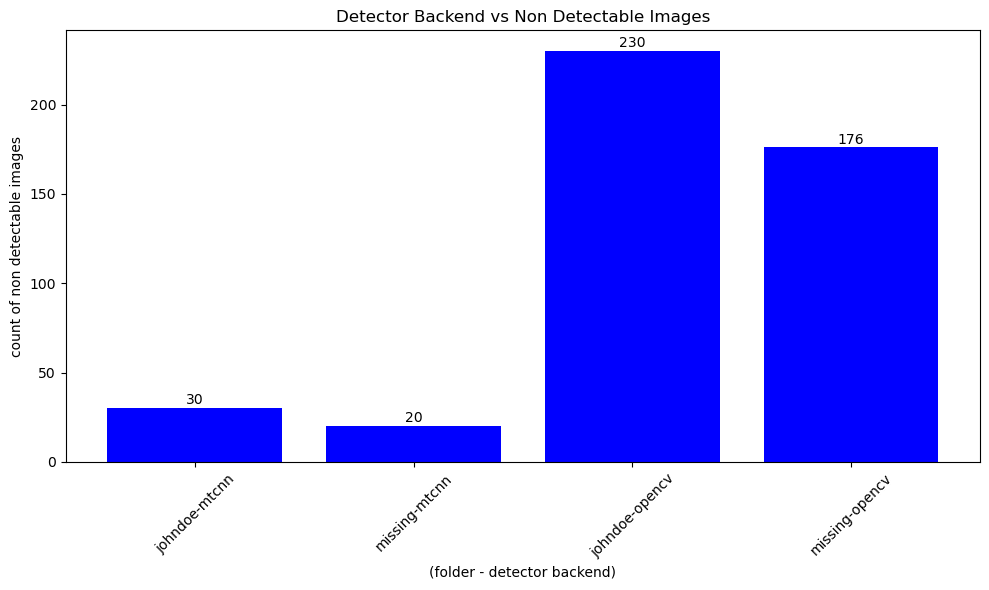

In [4]:
# Paths to the data files
data_files = [
    "non_detect_johndoe_mtcnn.csv",
    "non_detect_missing_mtcnn.csv",
    "non_detect_johndoe_opencv.csv",
    "non_detect_missing_opencv.csv"
]



# Create a list of y-axis values by counting the number of rows (non-detectable images) in each CSV file
y_values = [pd.read_csv(file).shape[0] for file in data_files]

# Create a list of x-axis labels
x_labels = ['johndoe-mtcnn', 'missing-mtcnn', 'johndoe-opencv', 'missing-opencv']



plt.figure(figsize=(10, 6))
bars = plt.bar(x_labels, y_values, color='blue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

# Add labels and title to the chart
plt.xlabel('(folder - detector backend)')
plt.ylabel('count of non detectable images')
plt.title('Detector Backend vs Non Detectable Images')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()


The provided bar chart visualizes the comparison of non-detectable images across different combinations of case statuses ('johndoe' and 'missing') and face detection backends ('mtcnn' and 'opencv'). Each bar in the graph represents a unique combination and is labeled with the respective count of non-detectable images.

### Key Observations from the Graph:
- **Y-axis (Count of Non Detectable Images)**: The height of each bar indicates the number of images where faces were not detected for each specific combination of case status and detection backend.
- **X-axis (Folder - Detector Backend)**: The labels on the x-axis identify the combinations being compared, such as 'johndoe-mtcnn' or 'missing-opencv'.
- **Color and Labels**: All bars are colored blue for consistency, and the exact count of non-detectable images is labeled on top of each bar, providing immediate numerical insights.
- **Comparative Analysis**:
  - The 'opencv' backend has higher counts of non-detectable images compared to 'mtcnn' for both 'johndoe' and 'missing' cases.
  - Specifically, 'missing-opencv' has 176 non-detectable images, and 'johndoe-opencv' has 230, indicating that 'opencv' might be less effective in detecting faces in these particular cases.
  - In contrast, 'mtcnn' shows significantly lower counts of non-detectable images, with only 20 for 'missing' and 30 for 'johndoe'.
